In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.patches import Ellipse
from matplotlib import patches
%matplotlib notebook
np.set_printoptions(formatter={'float': lambda x: "{0:5.3f}".format(x)})

to do : 
    1. plot the ellipse, 
    2. refactor with class
    3. identify diverge cases
    4. map of convergence, 

# diagnostic tool

In [42]:
def plot_distance(arg, val):
    distance_arg = np.linalg.norm(arg, axis=(1,2))
    distance_val = np.linalg.norm(val, axis=1)
    fig = plt.figure(figsize=(8, 4))
    ax1=fig.add_subplot(1, 1, 1)
    ax1.plot(np.arange(val.shape[0]), distance_arg, color='green', label='Frobenius norm \nof parameters')
    ax1.set_xlabel('iteration', fontsize=15)
    ax1.set_ylabel('distance in domain', color='green', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.legend(loc='lower left')

    ax2 = ax1.twinx()  
    ax2.plot(np.arange(val.shape[0]), distance_val, color='red', label='L2 norm \nof func value')
    ax2.set_ylabel('distance in codomain', color='red', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')
    
def animate_moving_cluster(stats, num):
    def generate_points(stats, num):
        cluster_x = np.zeros((stats['mean'].shape[0], num, 2))
        for iter_ in range(stats['mean'].shape[0]):
            for n in range(num):
                cluster_x[iter_, n] = (stats['mean'][iter_] + stats['var'][iter_] @ np.random.randn(2, 1)).ravel()
        return cluster_x
    arg = generate_points(stats, num)
    arg_re = arg.reshape(-1, 2)
    x = np.array(arg_re[:,0])
    y = np.array(arg_re[:,1])
    eigVal_sqrts = np.linalg.norm(stats['var'], ord=2, axis=(1))
    def animate(i):
        plt.clf()
        ax = fig.add_subplot(1, 1, 1)
        mean = stats['mean'][i]
        eigVal_sqrt = eigVal_sqrts[i]
        eigVec = stats['var'][i] / eigVal_sqrt
        width, height = 2 * 3 * eigVal_sqrt
        angle = np.arctan2(eigVec[0,1], eigVec[0,0]) * 180 / np.pi
        e1 = patches.Ellipse(mean, width, height,
                             angle=-angle, linewidth=2, fill=False, zorder=2)
        ax.add_patch(e1)
        ax.scatter(mean[0], mean[1], c='black', s=15)
        ax.axvline(c='grey', lw=1)
        ax.axhline(c='grey', lw=1)
        ax.set_xlim(np.min(x),  np.max(x))
        ax.set_ylim(np.min(y), np.max(y))
        ax.set_title('iter=%d' % (i+1))
        #ax.grid(True)
        p = sns.scatterplot(x=x[int(i*num):int((i+1)*num)], y=y[int(i*num):int((i+1)*num)], 
                            color="r", hue=i, hue_norm=(0, arg.shape[0]), legend=False)
    fig = plt.figure(figsize=(8,4))
    ani = animation.FuncAnimation(fig, animate, frames=arg.shape[0], repeat=False, interval=500)
    plt.show()
    return ani

def animate_scatterplot_distance(arg, val, stats):
    arg_re = arg.reshape(-1, 2)
    x = np.array(arg_re[:,0])
    y = np.array(arg_re[:,1])
    distance_val = np.linalg.norm(val, axis=1)
    distance_arg = np.linalg.norm(arg, axis=(1,2))
    eigVal_sqrts = np.linalg.norm(stats['var'], ord=2, axis=(1))
    def animate(i):
        plt.clf()
        ax0 = fig.add_subplot(2, 1, 1)
        ax0.set_xlim(np.min(x),  np.max(x))
        ax0.set_ylim(np.min(y), np.max(y))
        ax0.set_title('iter=%d, func distance=%.3f, domain distance=%.3f' % (i+1, distance_val[i+1], distance_arg[i+1]))
        mean = stats['mean'][i]
        eigVal_sqrt = eigVal_sqrts[i]
        eigVec = stats['var'][i] / eigVal_sqrt
        width, height = 2 * 3 * eigVal_sqrt
        angle = np.arctan2(eigVec[0,1], eigVec[0,0]) * 180 / np.pi
        e1 = patches.Ellipse(mean, width, height,
                             angle=-angle, linewidth=2, fill=False, zorder=2)
        ax0.add_patch(e1)
        ax0.scatter(mean[0], mean[1], c='black', s=15)
        ax0.axvline(c='grey', lw=1)
        ax0.axhline(c='grey', lw=1)
        ax0.set_xlim(np.min(x),  np.max(x))
        ax0.set_ylim(np.min(y), np.max(y))
        ax0.set_title('iter=%d' % (i+1))
        p = sns.scatterplot(x=x[int(i*6):int((i+1)*6)], y=y[int(i*6):int((i+1)*6)], color="r", hue=i, hue_norm=(0,val.shape[0]), legend=False)
        #p.tick_params(labelsize=17)
        #ax0.set_setp(p.lines,linewidth=7)

        ax1 = fig.add_subplot(2, 1, 2)
        ax1.plot(np.arange(i+1), distance_arg[:i+1], color='green', label='Frobenius norm \nof parameters')
        ax1.set_xlim(0, val.shape[0])
        ax1.set_ylim(np.min(distance_arg)*0.9, np.max(distance_arg)*1.1)
        ax1.set_xlabel('iteration', fontsize=15)
        ax1.set_ylabel('distance in domain', color='green', fontsize=15)
        ax1.tick_params(axis='y', labelcolor='green')
        ax1.legend(loc='lower left')
        
        ax2 = ax1.twinx()  
        ax2.plot(np.arange(i+1), distance_val[:i+1], color='red', label='L2 norm \nof func value')
        ax2.set_ylim(np.min(distance_val)*0.9, np.max(distance_val)*1.1)
        ax2.set_ylabel('distance in codomain', color='red', fontsize=15)
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.legend(loc='upper right')
    fig = plt.figure(figsize=(8,4))
    ani = animation.FuncAnimation(fig, animate, frames=val.shape[0], repeat=False, interval=500)
    plt.show()
    return ani
'''
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
ani.save('Evolution.mp4', writer=writer)
'''

def print_mean_variance(stats):
    # print mean and variance of each iteration
    for i, a in enumerate(stats['var']):
        print('iter=',i, 'mean=', stats['mean'][i].T , 'var=\n', a@a.T, '\n')
        
def print_evaluations_per_iteration(stats):
    for i, iter_ in enumerate(stats['evals_per_iter']):
        print('iter=', i, '\n', iter_.squeeze(),'\n') 
    
def print_arguments_before_and_after_move(stats):
    for i, iter_ in enumerate(stats['x_vs_original']):
        print('iter=', i, '\nbefore\n', iter_[:2], '\nafter\n', iter_[2:], '\n') 

# Test function

In [3]:
def ackley(x):
    '''
    the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
    x and y is interchangeable
    global minimum is 0 with arguments x=y=0
    local minimums far away from orgin are 20
    supremum is 20 + e - 1/e = 22.35
    being symmetric along x=0, y=0, y=x lines
    '''
    global arg1, arg2
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

def derivative_ackley(x):
    global arg1, arg2
    return np.array([-0.4 * x[0] / arg1 * np.exp(arg1) + np.pi * np.sin(2 * np.pi * x[0]) * np.exp(arg2), 
            -0.4 * x[1] / arg1 * np.exp(arg1) + np.pi * np.sin(2 * np.pi * x[1]) * np.exp(arg2)])

# Test optimization method

In [98]:
def cma_es_general(mean0, D, alpha, beta, adjust, func, dfunc):
    '''
    @param mean0: initial mean of groups of points
    @param D: sqrt of eigenvalues of initial variance of points
    @param alpha: initial step size
    @param beta: control the armijo condition
    @return snapshot_val: snapshot of func values of points every 2 iterations
    @return snapshot_arg: snapshot of positions of points every 2 iterations
    '''
    # initial mean and variance
    # mean = np.random.rand(dim, 1) * 20
    # D = np.ones((dim,))              
    
    # --------------------  Initialization --------------------------------  
    # User defined input parameters (need to be edited)
    print("*******starting soon, intitial mean: ********\n", mean0)
    dim = 2
    mean = mean0
    sigma = 0.3
    D = D / sigma
    tolerance = 1e-5
    max_iter = 200
    
    # Strategy parameter setting: Selection  
    lambda_ = 4 + int(3 * np.log(dim))       # the size of solutions group
    mu = int(lambda_ / 2)     # only best "mu" solutions are used to generate iterations
    weights = np.log(mu + 1/2) - np.log(np.arange(mu) + 1) 
    weights = weights / np.sum(weights)      # used to combine best "mu" solutions
    mueff = np.sum(weights)**2 / np.sum(weights**2) 
    
    # Strategy parameter setting: Adaptation
    cc = (4 + mueff / dim) / (dim + 4 + 2 * mueff / dim)  # time constant for cumulation for C
    cs = (mueff + 2) / (dim + mueff + 5)  # t-const for cumulation for sigma control
    c1 = 2 / ((dim + 1.3)**2 + mueff)    # learning rate for rank-one update of C
    cmu = min(1 - c1, 2 * (mueff - 2 + 1 / mueff) / ((dim + 2)**2 + mueff))  # and for rank-mu update
    damps = 1 + 2 * max(0, np.sqrt((mueff - 1)/( dim + 1)) - 1) + cs  # damping for sigma, usually close to 1                                                                 
        
    # Initialize dynamic (internal) strategy parameters and constants
    pc = np.zeros((dim, 1))     # evolution paths for C and sigma
    ps = np.zeros((dim, 1)) 
    B = np.eye(dim)     # B defines the coordinate system
    C = B * np.diag(D**2) * B.T            # covariance matrix C
    invsqrtC = B * np.diag(D**-1) * B.T    # C^-1/2 
    chiN = dim**0.5 * (1 - 1/(4 * dim) + 1 / (21 * dim**2))  # expectation of ||N(0,I)|| == norm(randn(N,1)) 
    
    def update_mean(x):
        return (weights @ x).reshape(dim, 1)
    def update_ps(ps, sigma, C, mean, mean_old):
        return (1 - cs) * ps + np.sqrt(cs * (2 - cs) * mueff) * invsqrtC @ (mean - mean_old) / sigma 
    def update_pc(pc, sigma, ps, mean, mean_old):
        hsig = np.abs(ps) / np.sqrt(1 - (1 - cs)**(2 * iter_/lambda_)) / chiN < 1.4 + 2/(dim + 1)
        return (1 - cc) * pc + hsig * np.sqrt(cc * (2 - cc) * mueff) * (mean - mean_old) / sigma
    def update_C(C, pc, x, mean_old, sigma):
        hsig = np.abs(ps) / np.sqrt(1 - (1 - cs)**(2 * iter_/lambda_)) / chiN < 1.4 + 2/(dim + 1)
        artmp = (1 / sigma) * (x - mean_old.reshape(1, dim))
        return (1 - c1 - cmu) * C + c1 * (pc * pc.T + (1 - hsig) * cc * (2 - cc) * C) + cmu * artmp.T @ np.diag(weights) @ artmp
    def update_sigma(sigma, ps):
        return sigma * np.exp((cs / damps) * (np.linalg.norm(ps)/ chiN - 1))
    
    x_orig, x = np.zeros((lambda_, dim)), np.zeros((lambda_, dim))
    x_vs_orig = []
    f = np.zeros((lambda_,))
    snapshot_val, snapshot_arg = [], []
    fmin = []
    iter_, eval_ = 0, 0
    iter_eval, iter_evals = np.zeros((lambda_, )), []
    r_means, r_vars = [], []
    stats = {}
    
    while iter_ < max_iter:
        iter_ += 1
        # generate candidate solutions with some stochastic elements
        for i in range(lambda_):
            x[i] = (mean + sigma * B @ np.diag(D) @ np.random.randn(dim, 1)).ravel() 
            x_orig[i] = x[i]
            x[i], eval_cnt = adjust(x[i], alpha, beta, func, dfunc)
            f[i] = func(x[i])
            eval_ += eval_cnt
            iter_eval[i] = eval_cnt
        # sort the value and positions of solutions 
        idx = np.argsort(f)
        x_ascending = x[idx]
        
        # record the trail and value of solutions points
        snapshot_arg.append(x_ascending)
        snapshot_val.append(f[idx])
        
        # update the parameter for next iteration
        mean_old = mean
        mean = update_mean(x_ascending[:mu])
        ps =   update_ps(ps, sigma, C, mean, mean_old)
        pc =   update_pc(pc, sigma, ps, mean, mean_old)
        sigma = update_sigma(sigma, ps)
        C =    update_C(C, pc, x_ascending[:mu], mean_old, sigma)
        C = np.triu(C) + np.triu(C, 1).T
        D, B = np.linalg.eig(C)
        D = np.sqrt(D)
        invsqrtC = B @ np.diag(D**-1) @ B
        
        # record data during process for post analysis
        r_means.append(mean)
        r_vars.append(sigma * B @ np.diag(D))
        iter_evals.append(iter_eval.copy())
        x_vs_orig.append(np.vstack((x_orig.T.copy(), x.T.copy())))
        
        # check the stop condition
        # f[0] < tolerance 
        if np.linalg.norm(f) < tolerance or (np.max(D) > (np.min(D) * 1e2)):  #np.abs(f[0] - fmin_old) < tolerance:
            break
    # analyse the result after finish
    if (np.max(D) > (np.min(D) * 1e2) and np.linalg.norm(mean) > (np.linalg.norm(mean0) * 1e1)) \
                or np.linalg.norm(mean) > (np.linalg.norm(mean0) * 1e2):
        print('diverge!!')
        stats['status'] = 'd'
    elif f[0] > tolerance:
        print('stuck in local minimum!!')
        stats['status'] = 'l'
    else:
        print('Global minimum')
        stats['status'] = 'g'
    print('eigenvalue of variance = {}'.format(D))
    print('min = {}, total iterations = {}, total evaluatios = {}\n position = {} {}\n'.format(f[0], iter_, eval_, x_ascending[0, 0], x_ascending[0, 1]))
    stats['evals_per_iter'] = np.array(iter_evals)
    stats['x_vs_original'] = np.array(x_vs_orig)
    stats['mean'] = np.array(r_means)
    stats['var'] = np.array(r_vars)
    return np.array(snapshot_val), np.array(snapshot_arg), stats

def line_search(x0, alpha, beta, f, deri_f):
    '''
    @param x0: initial point position
    @param alpha: initial step size
    @param beta: control the armijo condition
    @return x: point position after moving to local minimum
    '''
    x = x0.copy()
    alpha0 = alpha
    beta = 0.1
    tao = 0.5
    k_max = 100
    fx = f(x)
    p = - deri_f(x)
    fnx = f(x + alpha * p)
    evaluation_cnt = 4
    for k in range(k_max):
        while fnx > fx + alpha * beta * (-p @ p):
            alpha *= tao
            fnx = f(x + alpha * p)
            evaluation_cnt += 1
        x += alpha * p
        fx = fnx
        p = -deri_f(x)
        fnx = f(x + alpha * p)
        evaluation_cnt += 2
        if np.linalg.norm(p) < 1e-5:
            break
    return x, evaluation_cnt

def do_nothing(x0, alpha, beta, f, deri_f):
    return x0, 1

def round_off(x0, alpha, beta, f, deri_f):
    return np.round(x0), 1

In [107]:
class non_convex_optimisation:
    def __init__(self, func, dfunc, global_arg, global_val):
        self.func = func
        self.dfunc = dfunc
        self.global_arg = global_arg
        self.global_val = global_val
    def do_experiments(self, mean0, D, alpha, beta, adjust):
        try:
            self.val, self.arg, self.stats = cma_es_general(mean0, D, alpha, beta, adjust, self.func, self.dfunc)
        except np.linalg.LinAlgError as err:
            self.val, self.arg = None, None
            self.stats['status'] = 'd'
            print('diverge with LinAlgError!')
    def plot_distance(self):
        plot_distance(self.arg, self.val)
    def animate_moving_cluster(self, num):
        return animate_moving_cluster(self.stats, num)
    def animate_scatterplot_distance(self):
        return animate_scatterplot_distance(self.arg, self.val, self.stats)
    def print_mean_variance(self):
        print_mean_variance(self.stats)
    def print_evaluations_per_iteration(self):
        print_evaluations_per_iteration(self.stats)
    def print_arguments_before_and_after_move(self):
        print_arguments_before_and_after_move(self.stats)
    def get_recorded_data(self):
        return self.val, self.arg, self.stats

## Ex1 
setup:
    invariable: 
        - seed = 34
        - (cma-es)mean = [52.743, 12.21] 
        - variance = [9, 9]
        - (line search) alpha = 1
        - beta = 2
    variable:
        - line_search vs do_nothing

### pure CMA

In [28]:
np.random.seed(34)
mean0 = np.array([[52.743], [12.21]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex1_pureCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex1_pureCMA.do_experiments(mean0, sigma, alpha, beta, do_nothing)

*******starting soon, intitial mean: ********
 [[52.743]
 [12.210]]
stuck in local minimum!!
eigenvalue of variance = [0.002 0.002]
min = 19.966402869012175, total iterations = 200, total evaluatios = 1200
 position = 44.99991178407854 3.999992154590308

CPU times: user 92.8 ms, sys: 3.5 ms, total: 96.3 ms
Wall time: 97.2 ms


<IPython.core.display.Javascript object>


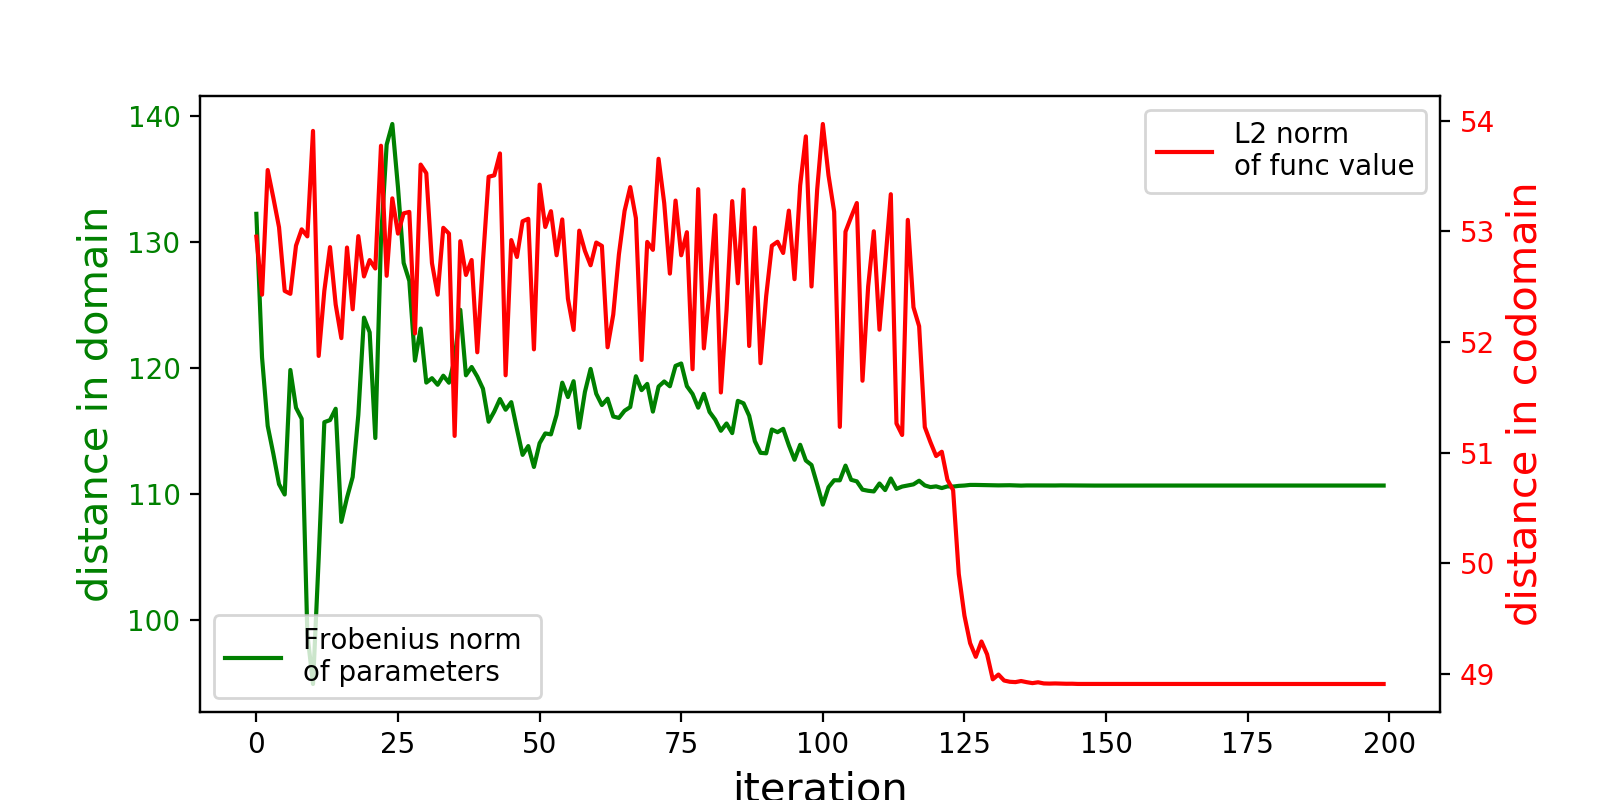

In [162]:
ex1_pureCMA.plot_distance()

<IPython.core.display.Javascript object>


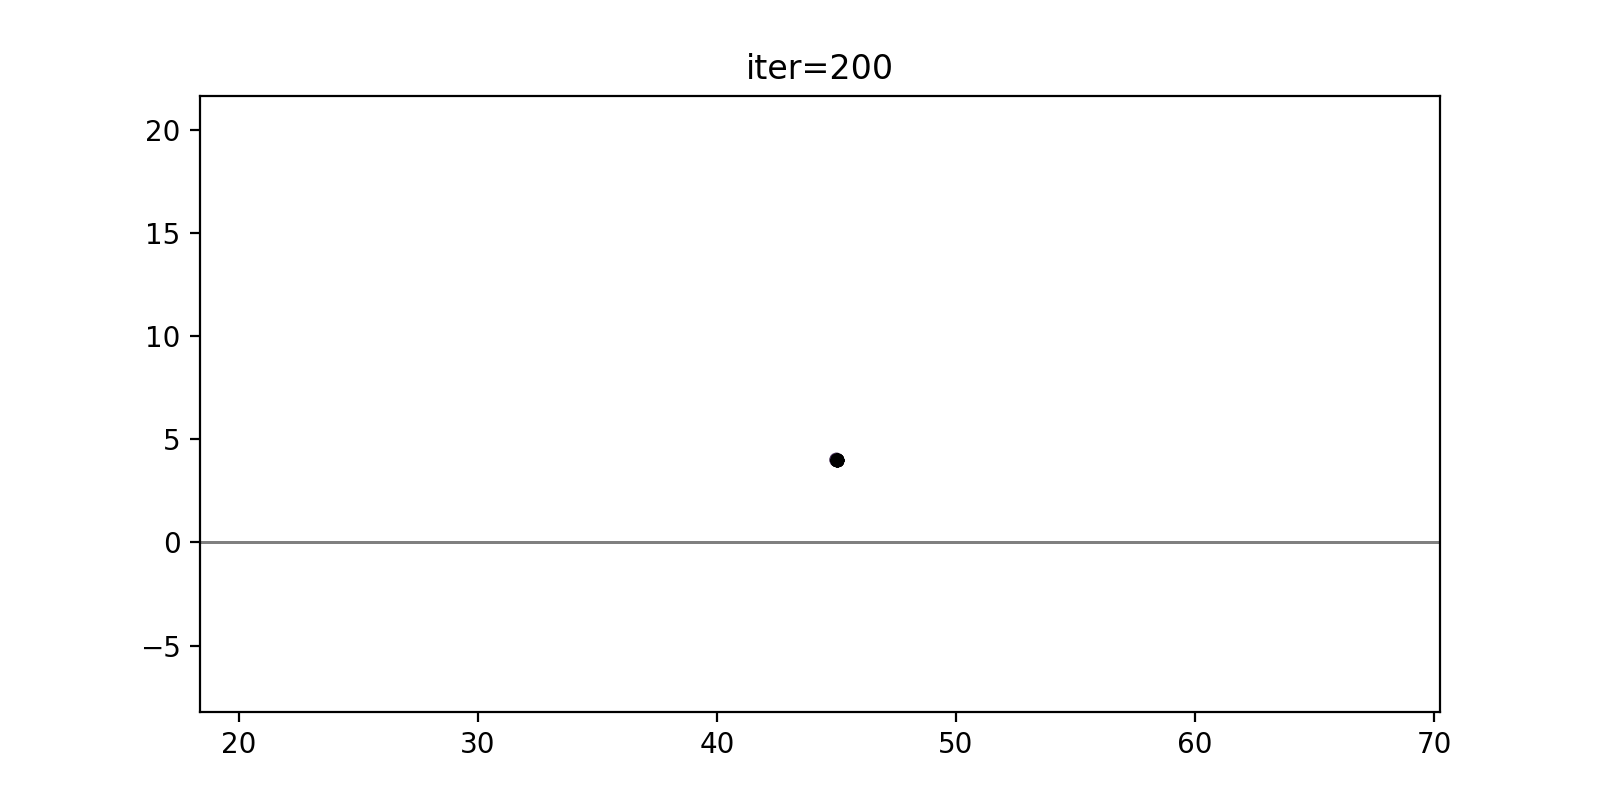

In [163]:
ex1_pureCMA.animate_moving_cluster(50)

<IPython.core.display.Javascript object>


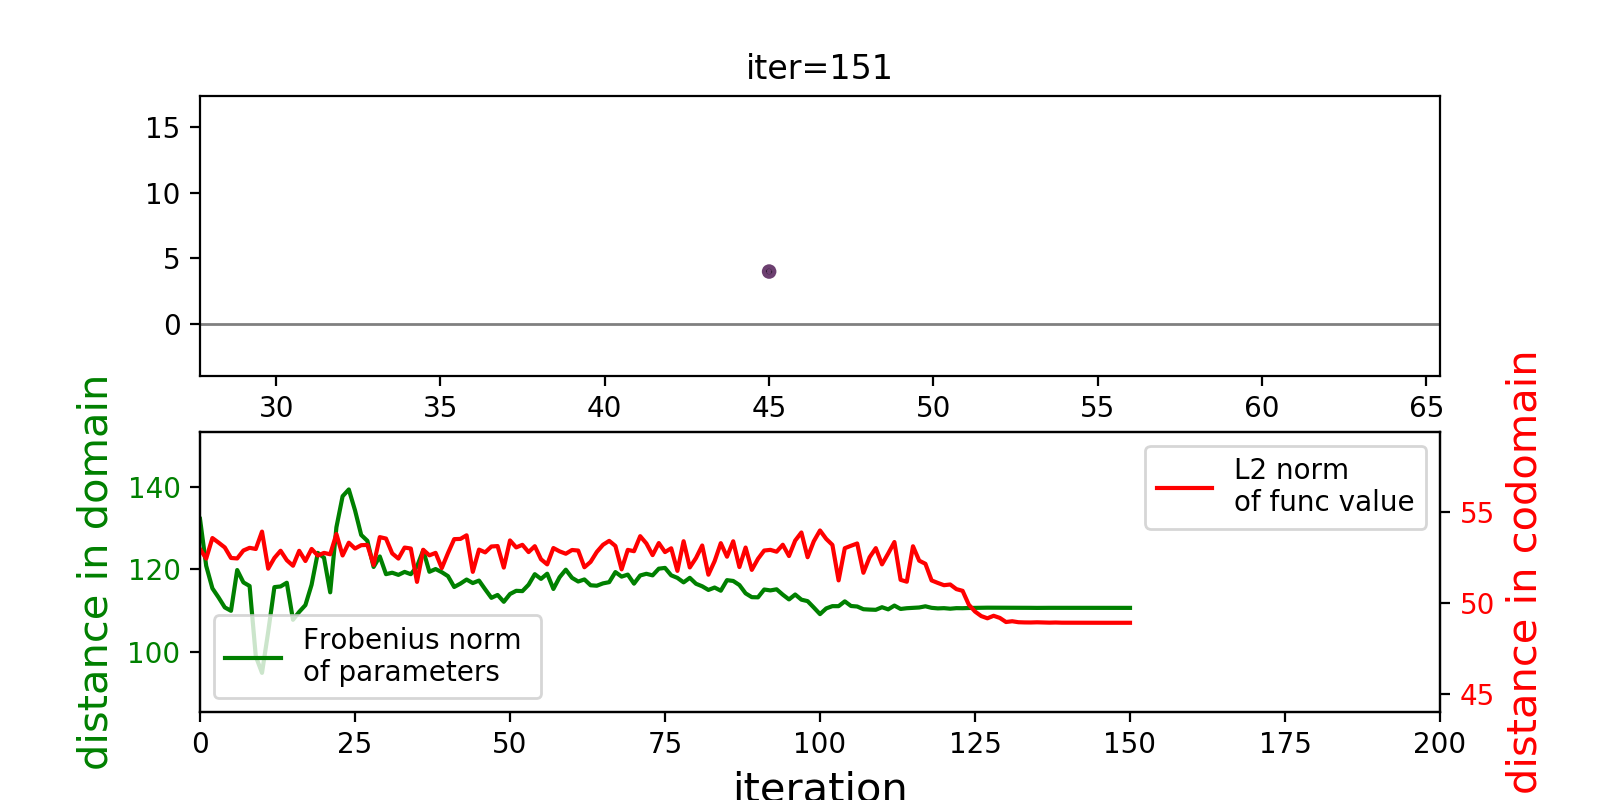

In [16]:
ex1_pureCMA.animate_scatterplot_distance()

In [40]:
ex1_pureCMA.print_mean_variance()

### line search 

In [27]:
np.random.seed(34)
mean0 = np.array([[52.743], [12.21]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex1_lineSearchCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex1_lineSearchCMA.do_experiments(mean0, sigma, alpha, beta, line_search)

*******starting soon, intitial mean: ********
 [[52.743]
 [12.210]]
Global minimum
eigenvalue of variance = [3.311 1.794]
min = 4.440892098500626e-16, total iterations = 24, total evaluatios = 16706
 position = 2.414947726522687e-17 1.9903473413229305e-17

CPU times: user 317 ms, sys: 11.3 ms, total: 328 ms
Wall time: 326 ms


<IPython.core.display.Javascript object>


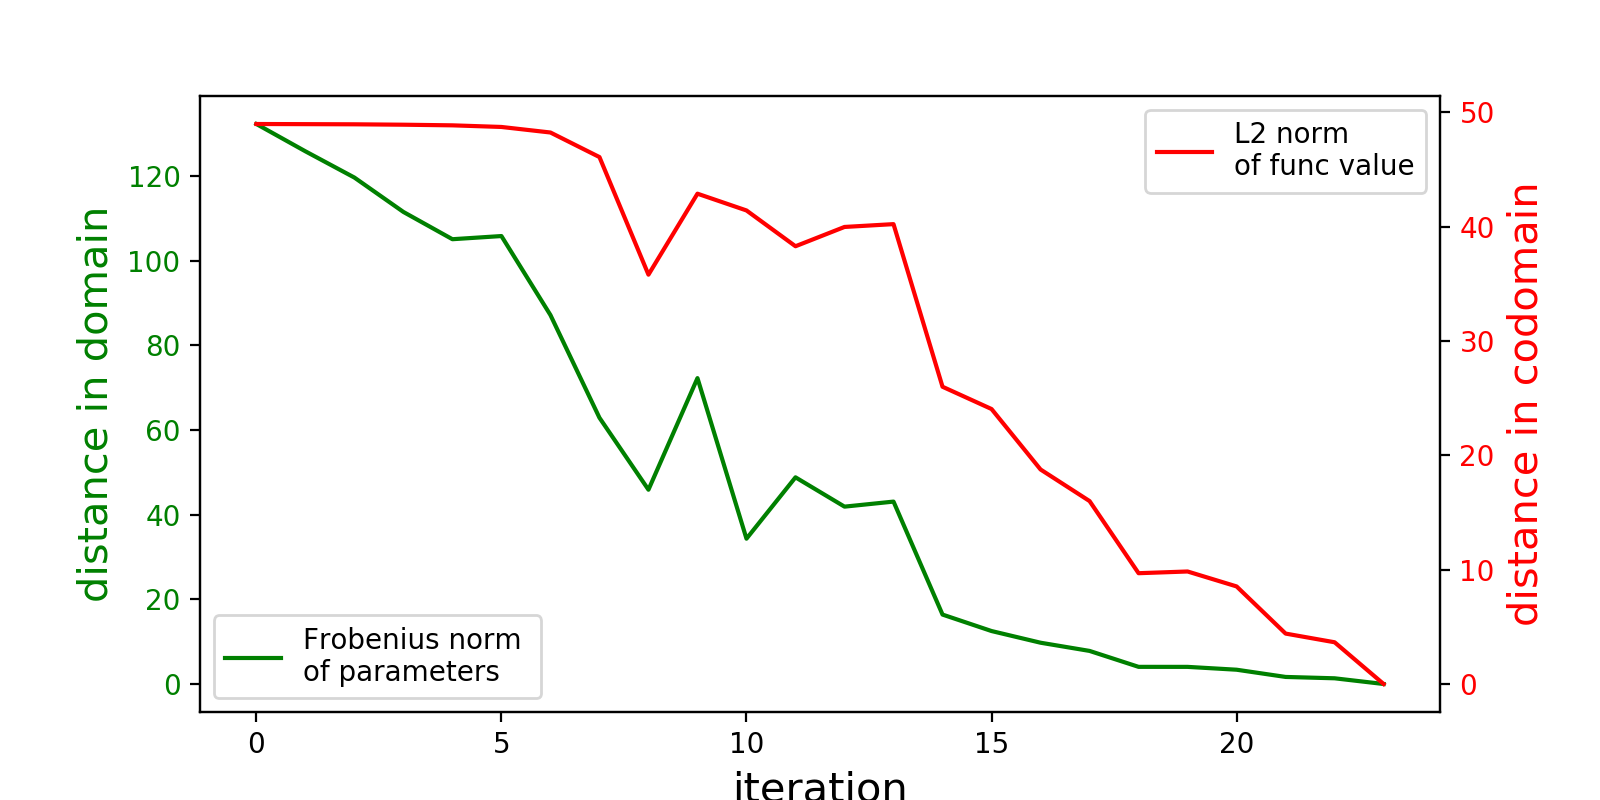

In [35]:
ex1_lineSearchCMA.plot_distance()

<IPython.core.display.Javascript object>


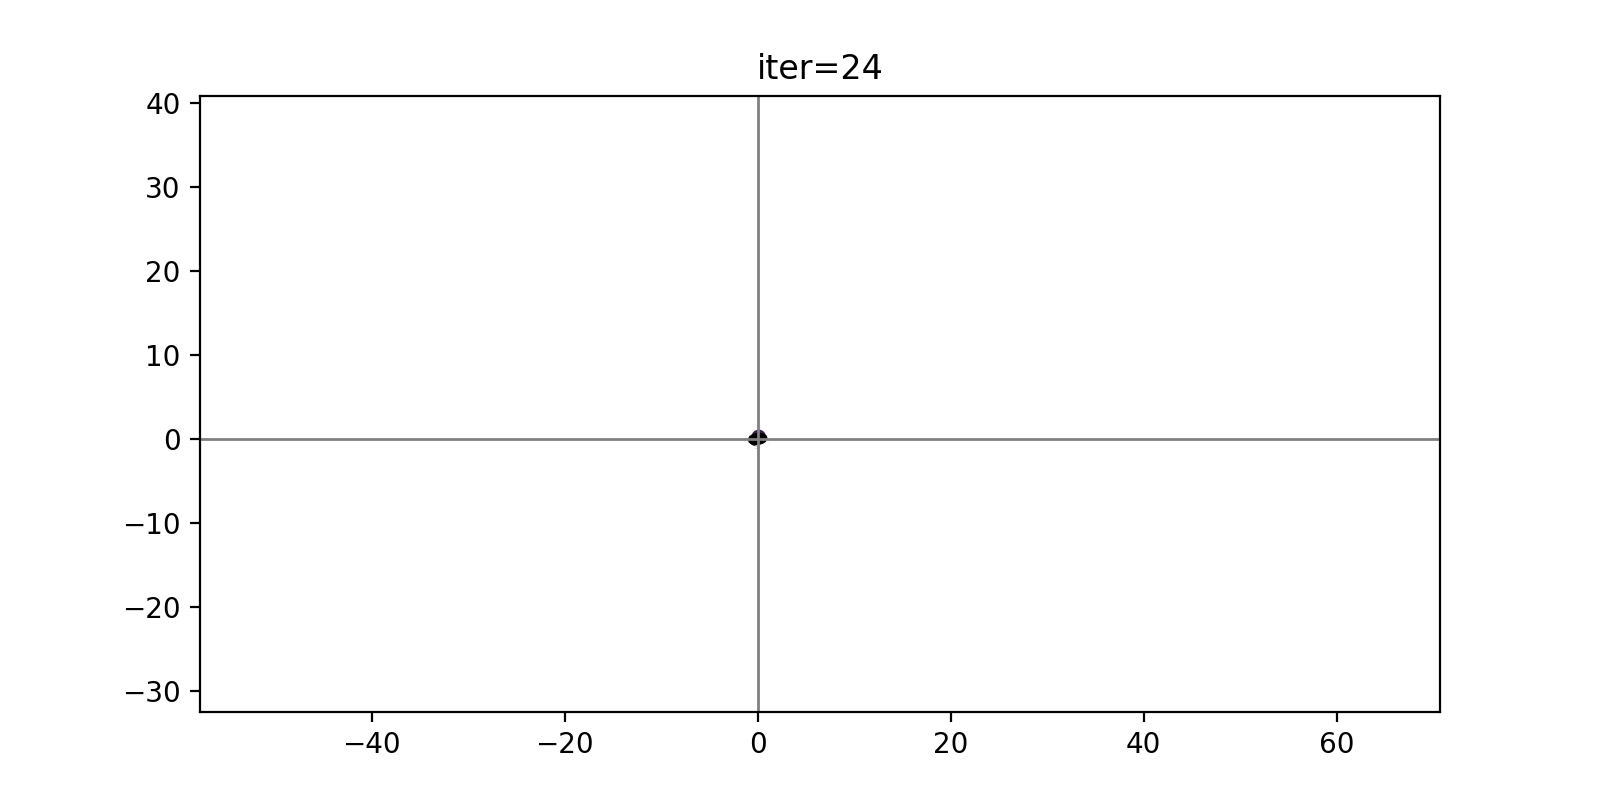

In [29]:
ex1_lineSearchCMA.animate_moving_cluster(50)

<IPython.core.display.Javascript object>


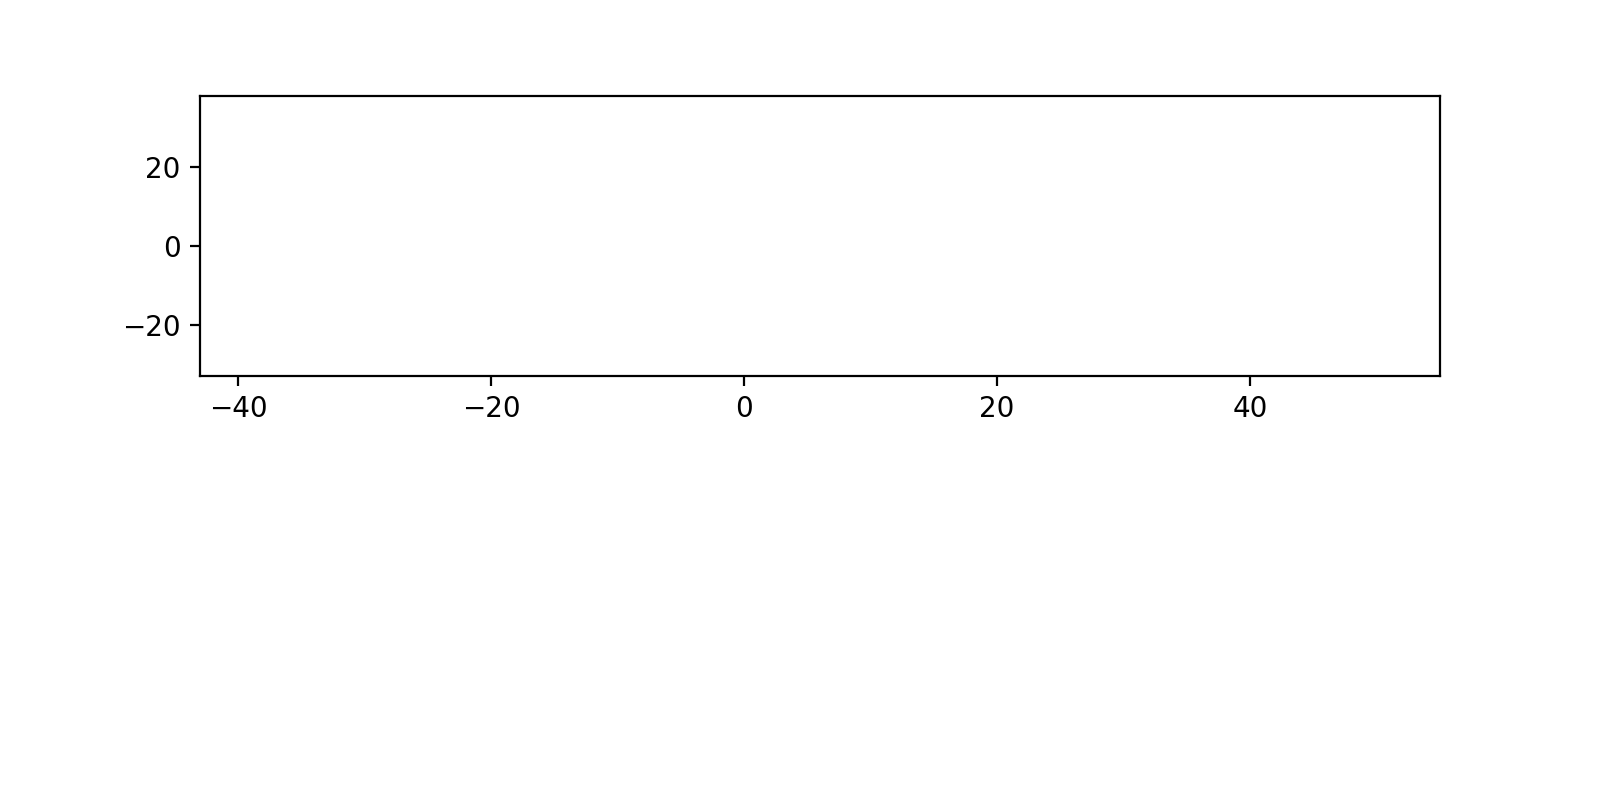

In [164]:
ex1_lineSearchCMA.animate_scatterplot_distance()

In [32]:
print_arguments_before_and_after_move(stats)

In [33]:
print_evaluations_per_iteration(stats)

In [34]:
print_arguments_before_and_after_move(stats)

### round off

In [36]:
np.random.seed(34)
mean0 = np.array([[52.743], [12.21]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex1_roundOffCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex1_roundOffCMA.do_experiments(mean0, sigma, alpha, beta, round_off)

*******starting soon, intitial mean: ********
 [[52.743]
 [12.210]]
Global minimum
eigenvalue of variance = [0.979 1.268]
min = 4.440892098500626e-16, total iterations = 29, total evaluatios = 174
 position = -0.0 0.0

CPU times: user 20 ms, sys: 4.53 ms, total: 24.5 ms
Wall time: 21.9 ms


<IPython.core.display.Javascript object>


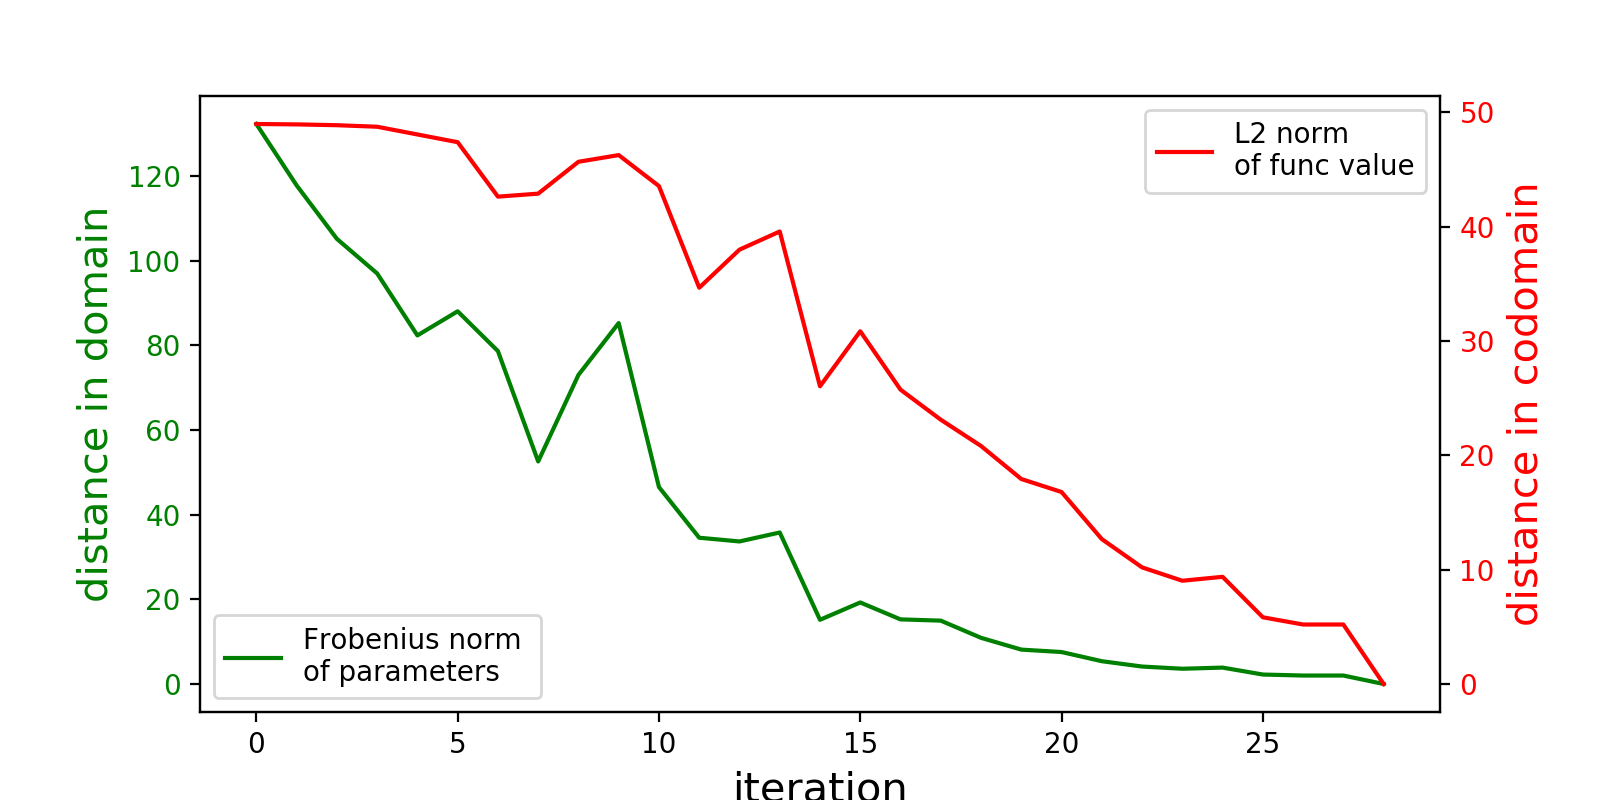

In [37]:
ex1_roundOffCMA.plot_distance()

<IPython.core.display.Javascript object>


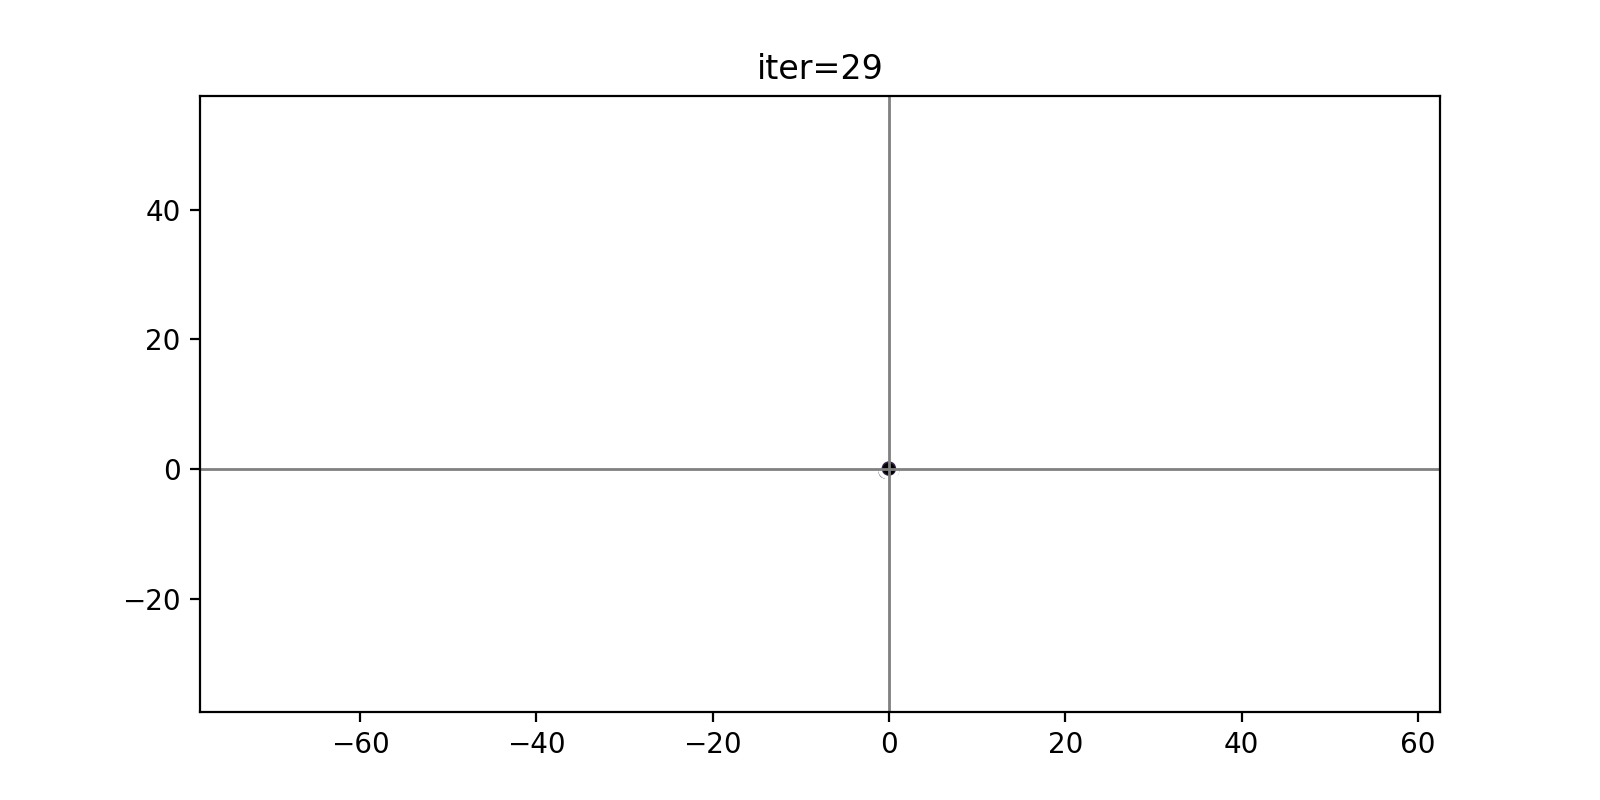

In [38]:
ex1_roundOffCMA.animate_moving_cluster(50)

In [40]:
ex1_roundOffCMA.print_arguments_before_and_after_move()

In [45]:
ex1_roundOffCMA.print_mean_variance()

## Ex2
setup:
    invariable: 
        - seed = 34
        - (cma-es)mean = [140.743, 152.21] 
        - variance = [9, 9]
        - (line search) alpha = 1
        - beta = 2
    variable:
        - line_search vs do_nothing vs round_off

### pure CMA

In [46]:
np.random.seed(34)
mean0 = np.array([[140.743], [152.21]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex2_pureCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex2_pureCMA.do_experiments(mean0, sigma, alpha, beta, do_nothing)

*******starting soon, intitial mean: ********
 [[140.743]
 [152.210]]
diverge!!
eigenvalue of variance = [0.898 0.076]
min = 20.655754117133586, total iterations = 200, total evaluatios = 1200
 position = -1556155.8731582821 280371.8847298474

CPU times: user 106 ms, sys: 4.87 ms, total: 110 ms
Wall time: 115 ms


<IPython.core.display.Javascript object>


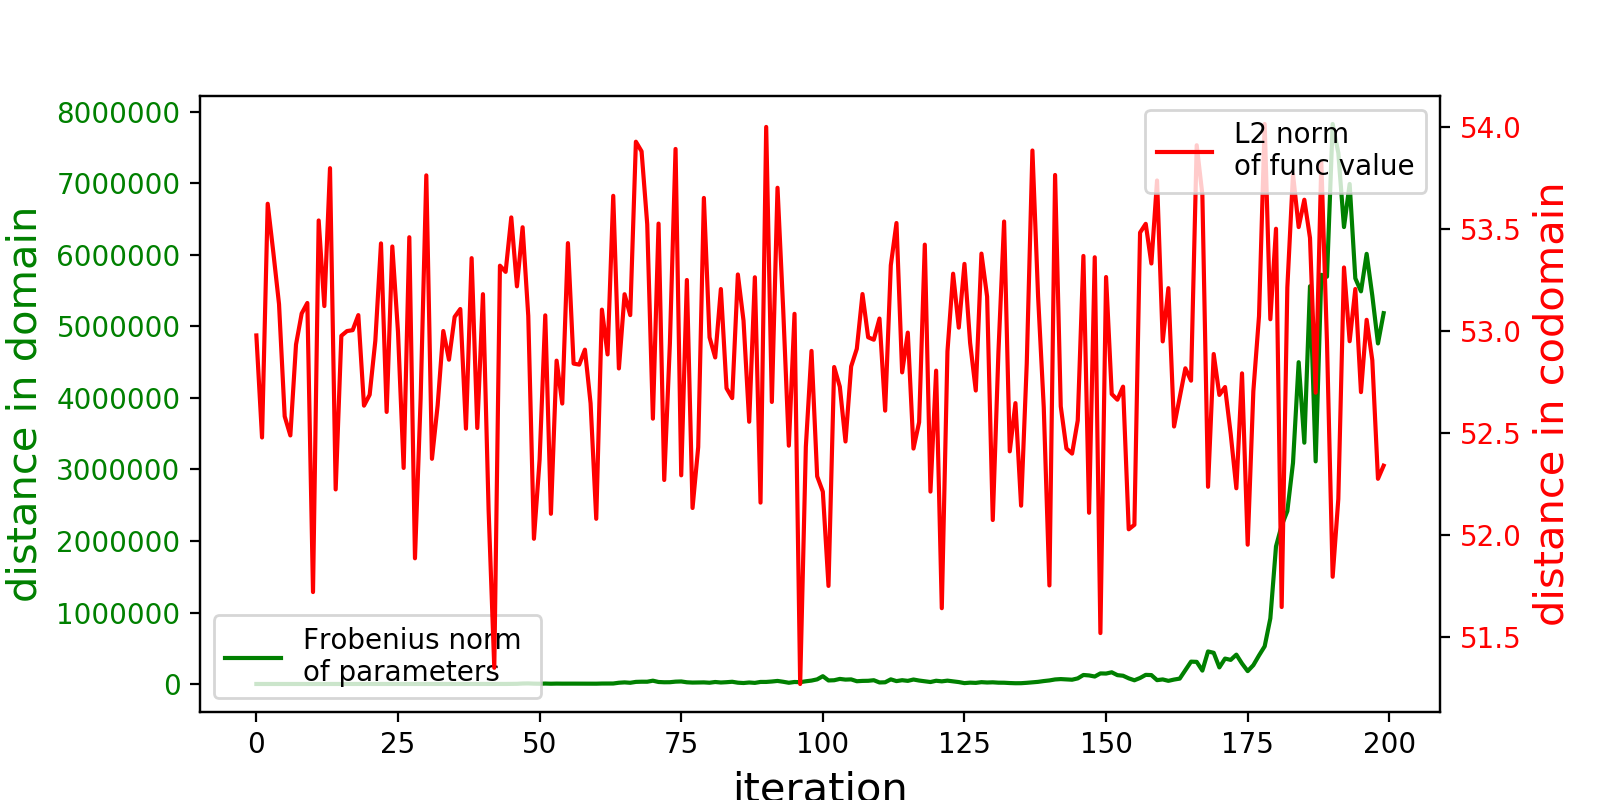

In [47]:
ex2_pureCMA.plot_distance()

<IPython.core.display.Javascript object>


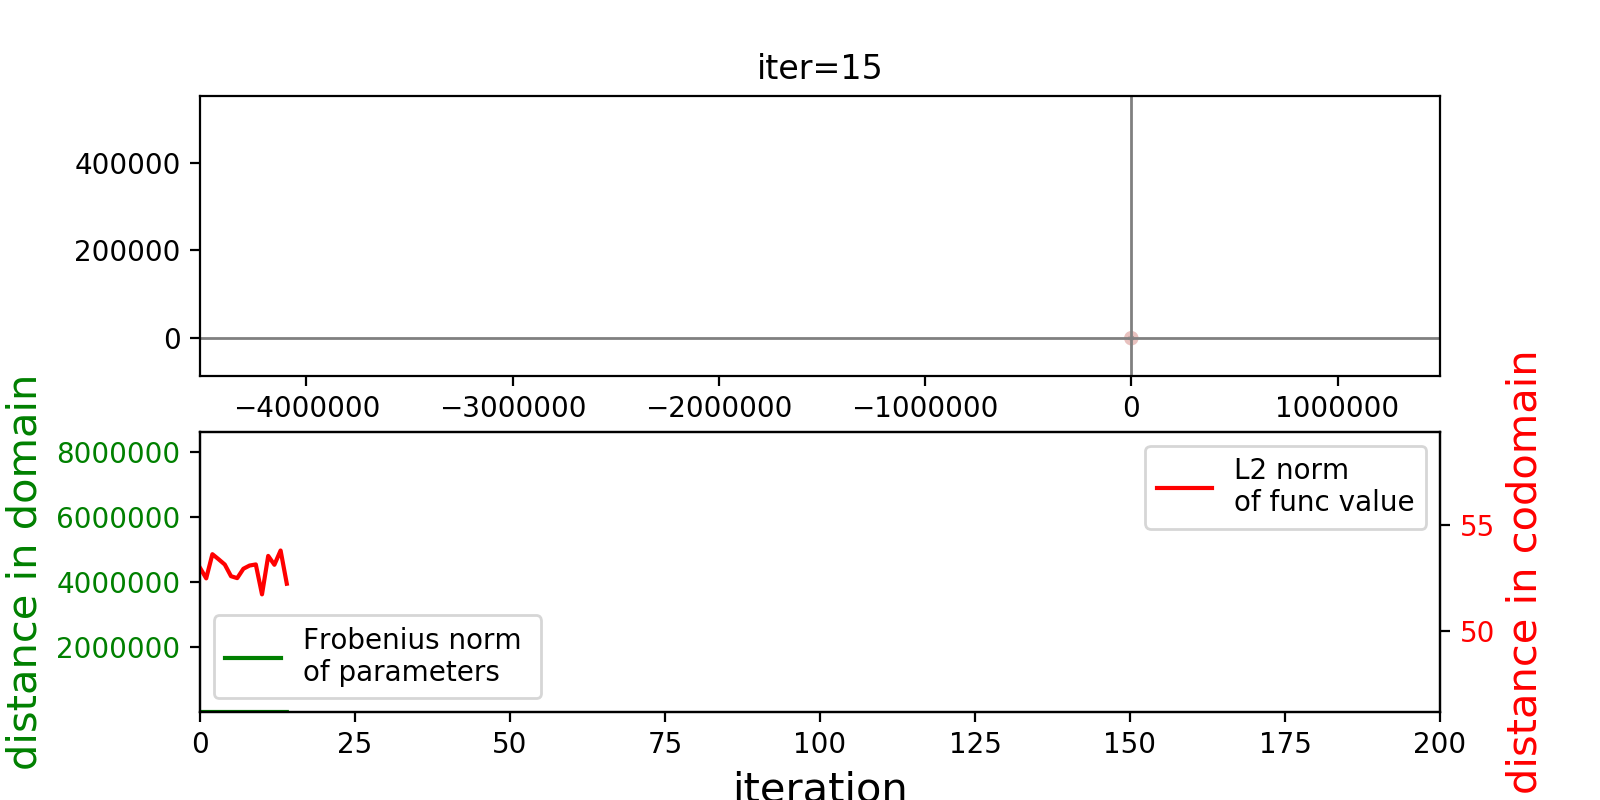

In [48]:
ex2_pureCMA.animate_scatterplot_distance()

### line search

In [157]:
np.random.seed(34)
mean0 = np.array([[140.743], [152.21]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex2_lineSearchCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex2_lineSearchCMA.do_experiments(mean0, sigma, alpha, beta, line_search)

<IPython.core.display.Javascript object>


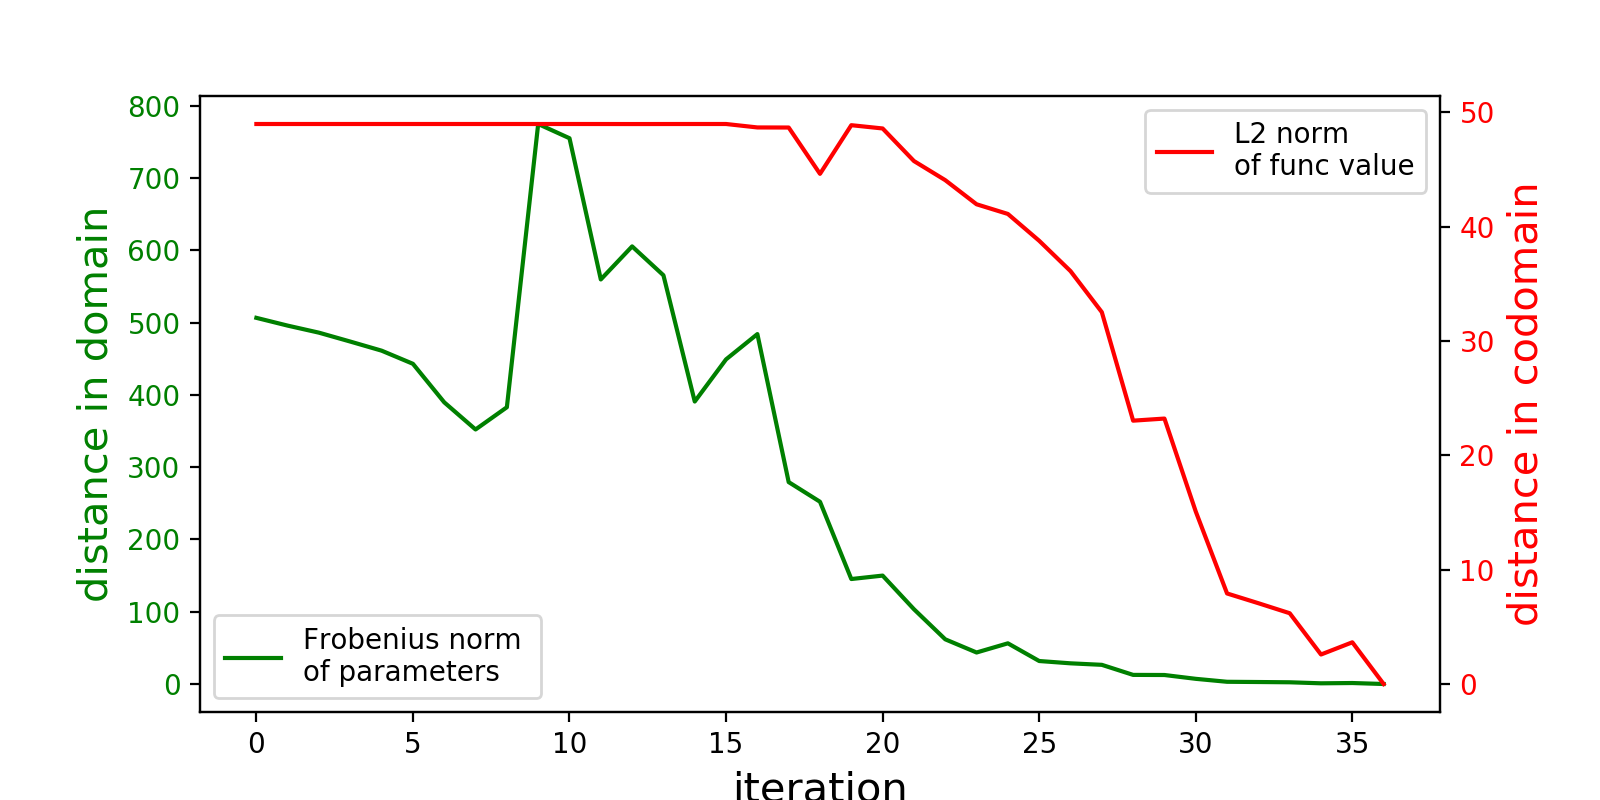

In [158]:
ex2_lineSearchCMA.plot_distance()

<IPython.core.display.Javascript object>


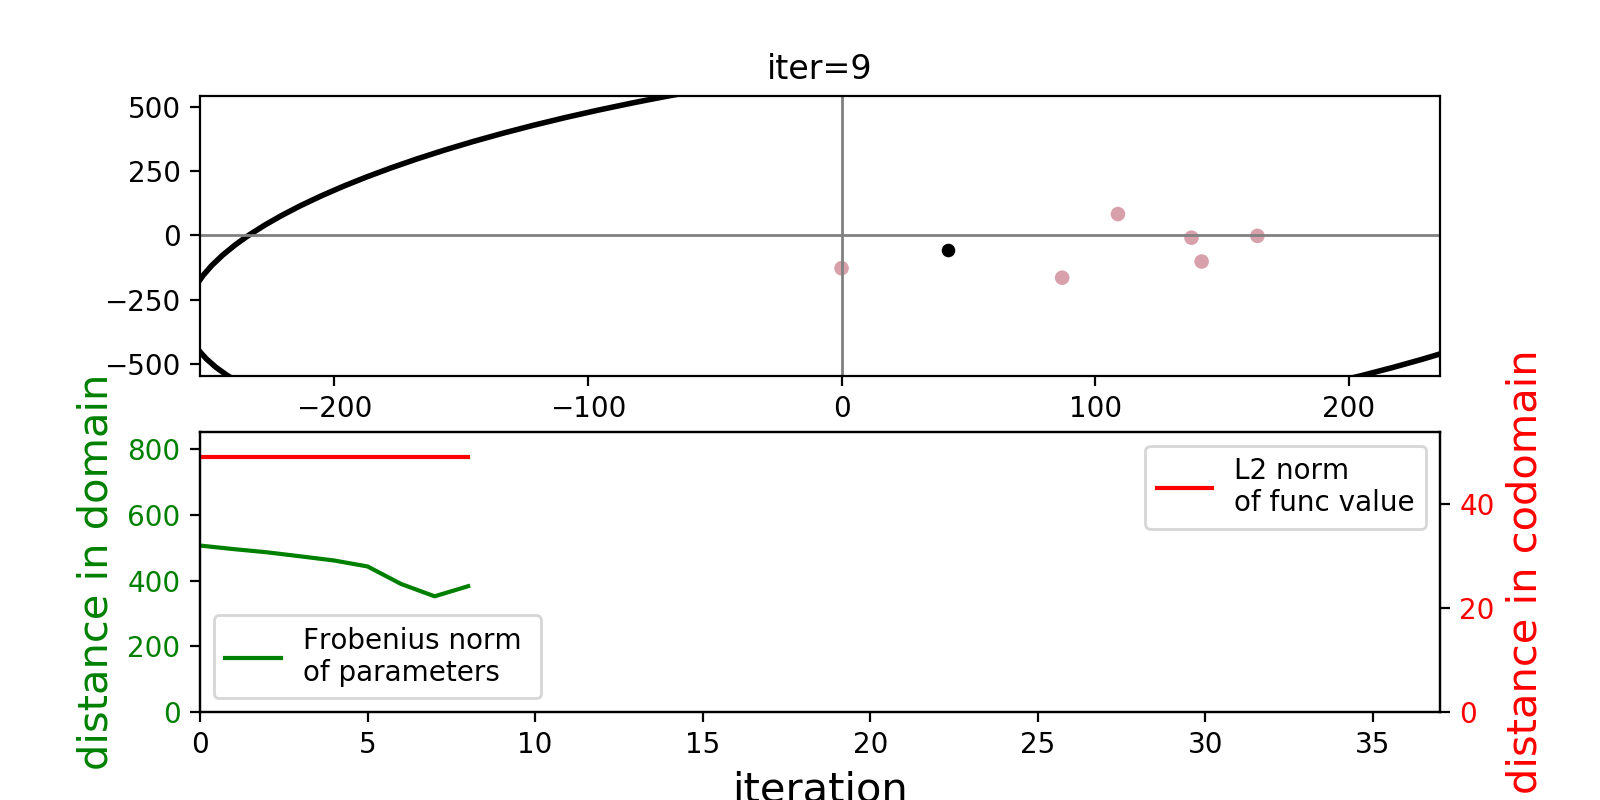

In [160]:
ex2_lineSearchCMA.animate_scatterplot_distance()

<IPython.core.display.Javascript object>


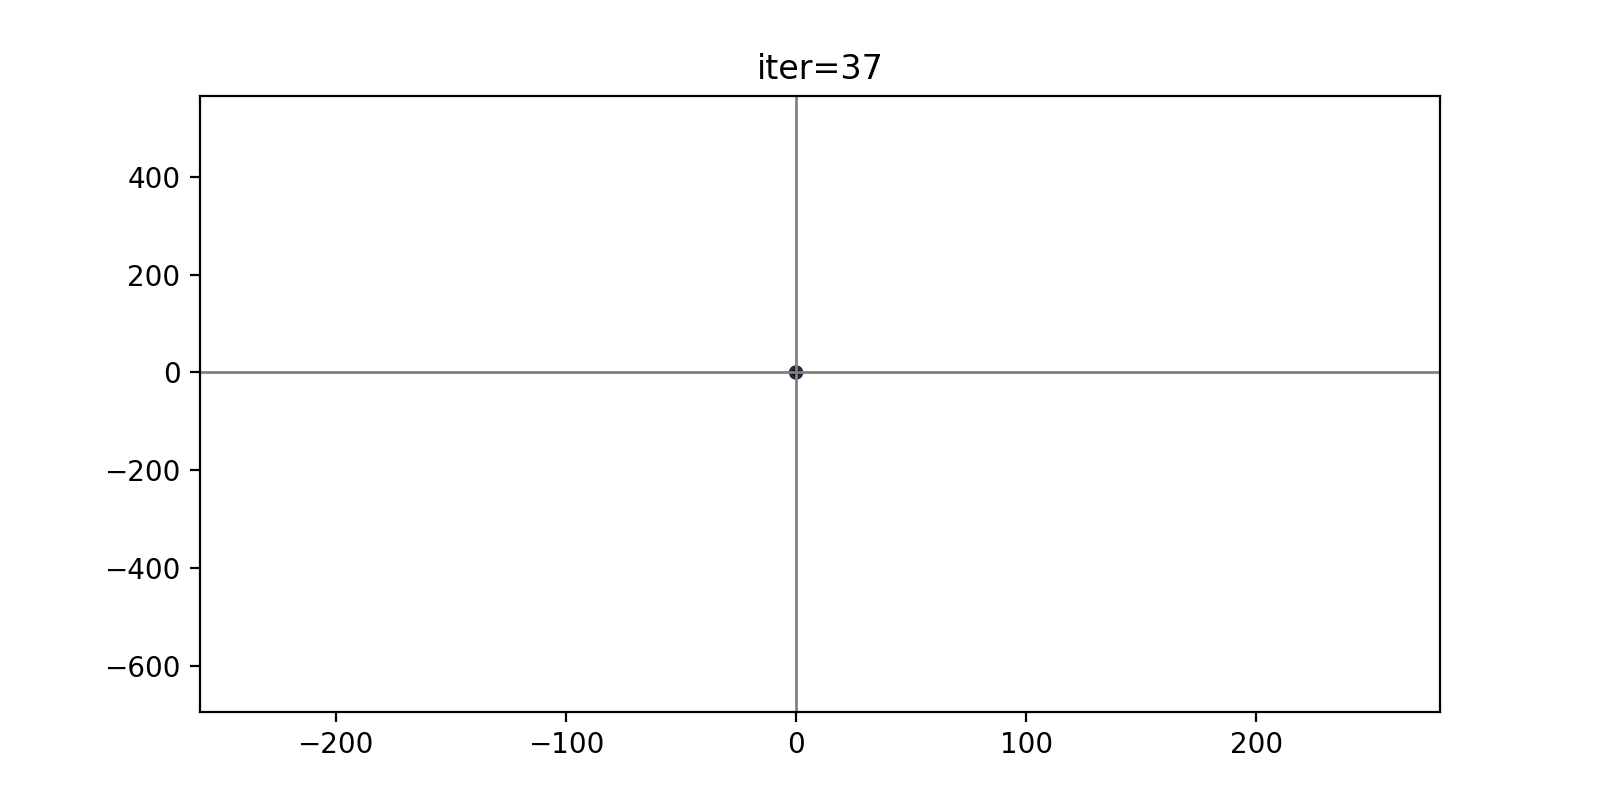

In [161]:
ex2_lineSearchCMA.animate_moving_cluster(50)

### round off

In [53]:
np.random.seed(34)
mean0 = np.array([[140.743], [152.21]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex2_roundOffCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex2_roundOffCMA.do_experiments(mean0, sigma, alpha, beta, round_off)

*******starting soon, intitial mean: ********
 [[140.743]
 [152.210]]
Global minimum
eigenvalue of variance = [0.568 0.811]
min = 4.440892098500626e-16, total iterations = 44, total evaluatios = 264
 position = -0.0 0.0

CPU times: user 23.4 ms, sys: 2.73 ms, total: 26.1 ms
Wall time: 25.8 ms


<IPython.core.display.Javascript object>


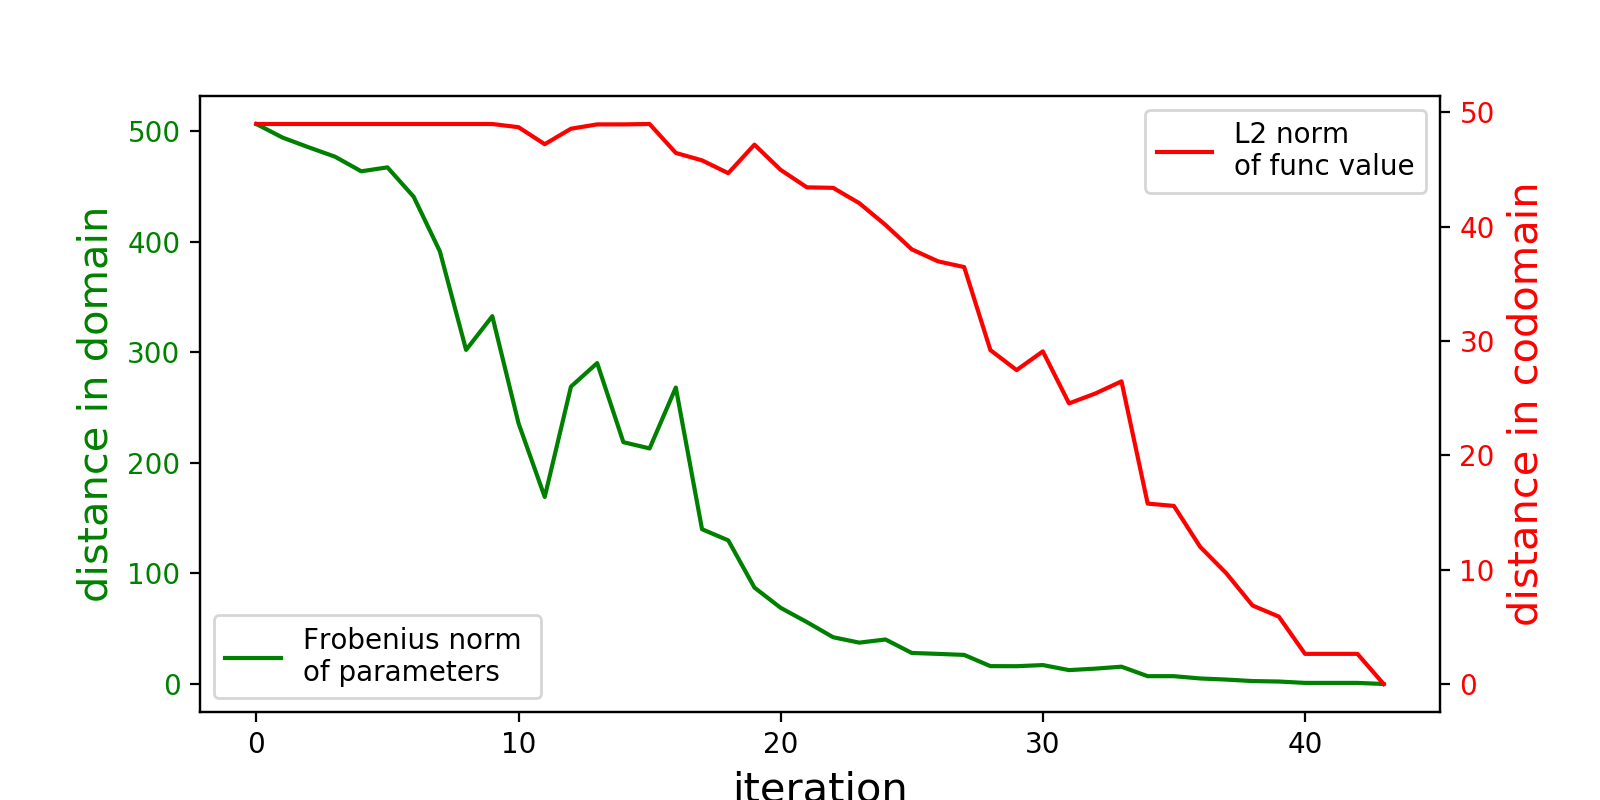

In [54]:
ex2_roundOffCMA.plot_distance()

<IPython.core.display.Javascript object>


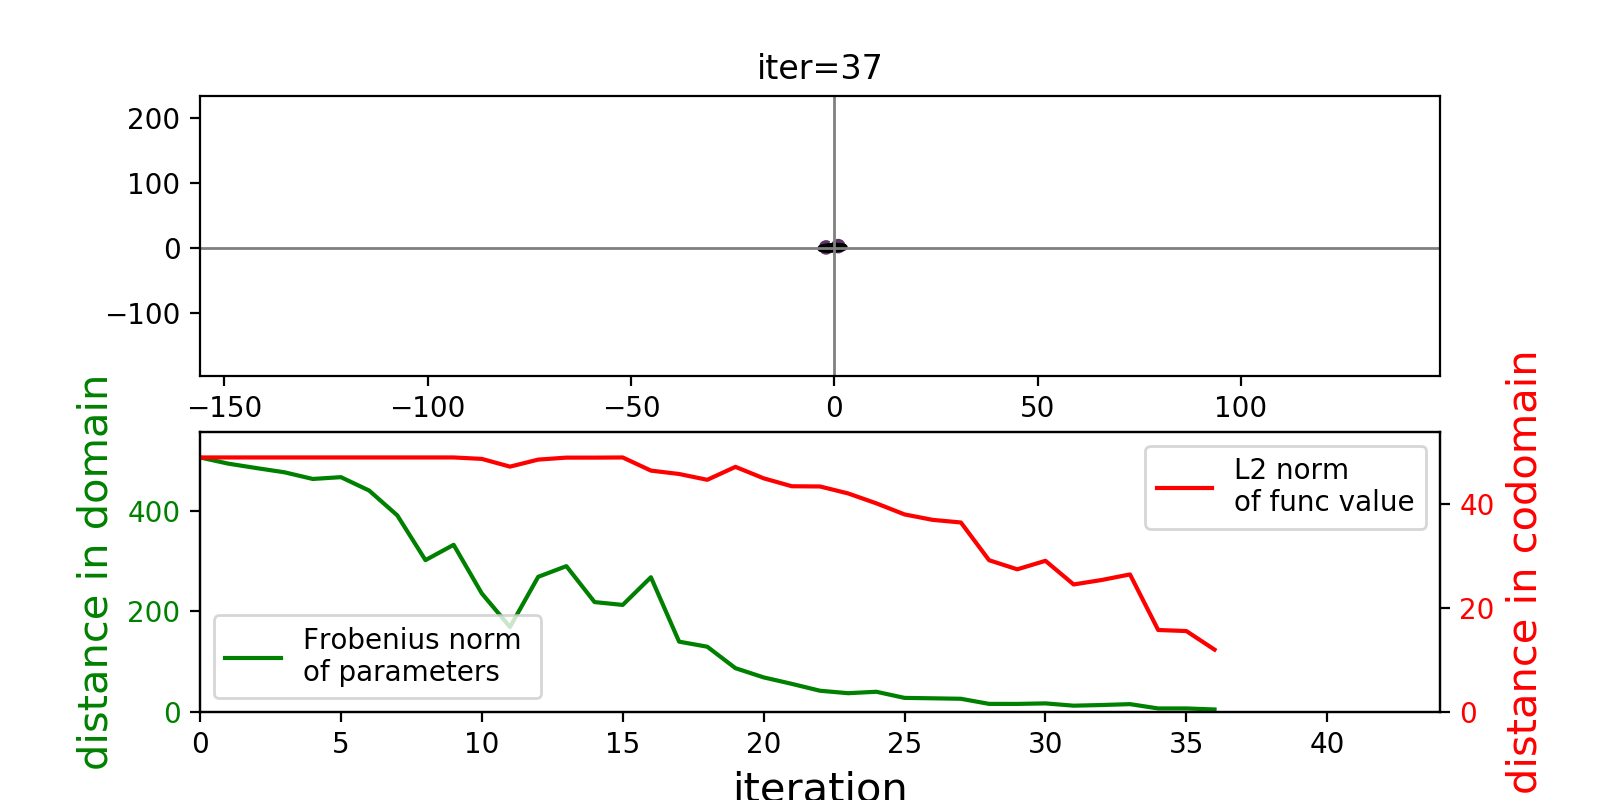

In [59]:
ex2_roundOffCMA.animate_scatterplot_distance()

In [57]:
ex2_roundOffCMA.print_mean_variance()

## Ex3
setup:
    invariable: 
        - seed = 34
        - (cma-es)mean = [629.193, 822.221] 
        - variance = [9, 9]
        - (line search) alpha = 1
        - beta = 2
    variable:
        - line_search vs do_nothing vs round_off

### Pure CMA

In [68]:
np.random.seed(34)
mean0 = np.array([[629.193], [822.221]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex3_pureCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex3_pureCMA.do_experiments(mean0, sigma, alpha, beta, do_nothing)

*******starting soon, intitial mean: ********
 [[629.193]
 [822.221]]
stuck in local minimum!!
eigenvalue of variance = [0.001 0.000]
min = 20.0, total iterations = 200, total evaluatios = 1200
 position = 648.9999999970927 808.9999999968353

CPU times: user 98.2 ms, sys: 4.07 ms, total: 102 ms
Wall time: 104 ms


<IPython.core.display.Javascript object>


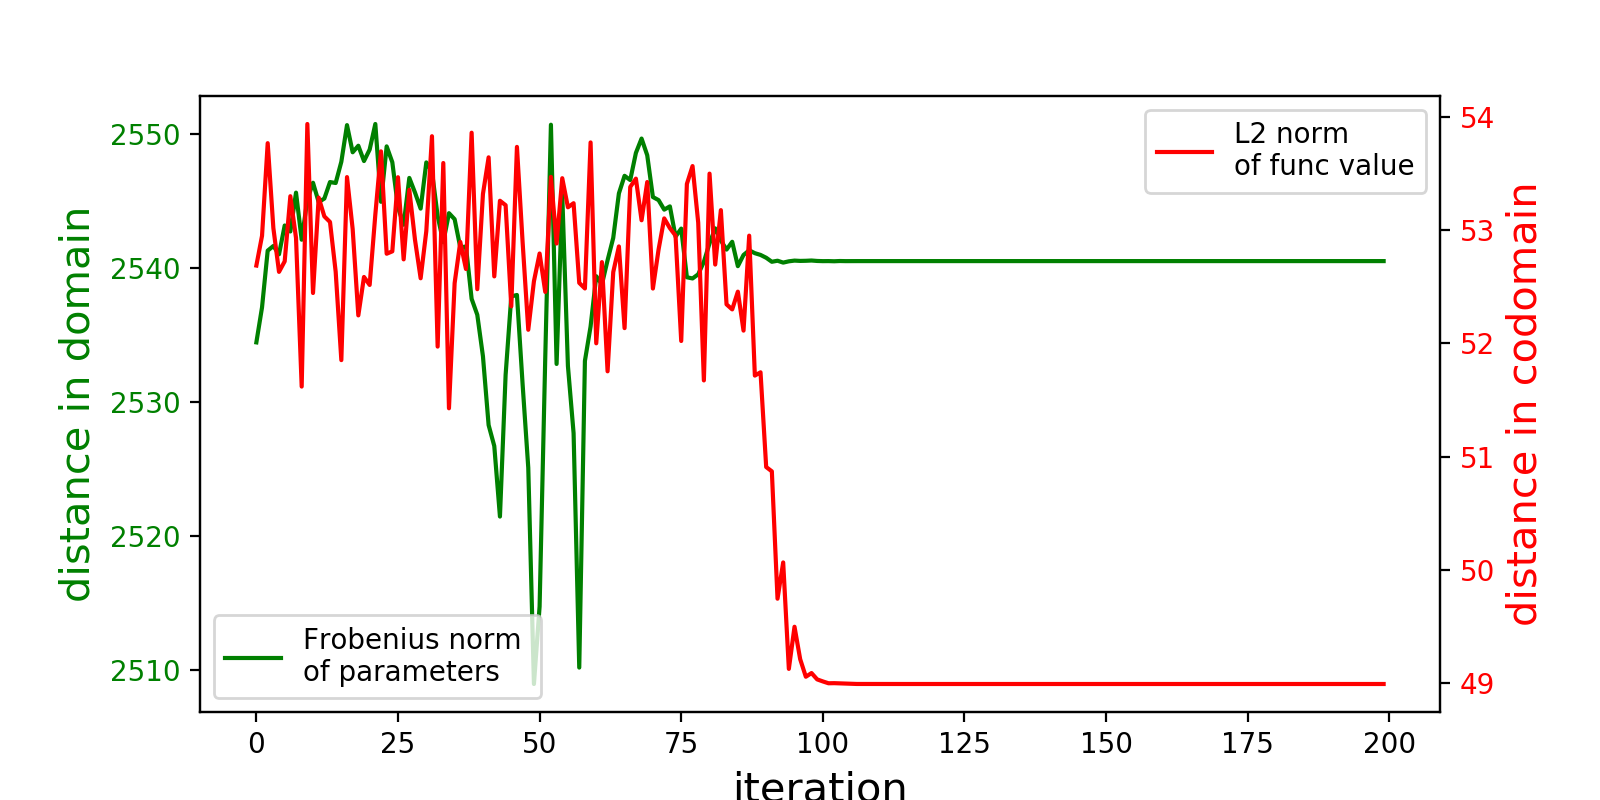

In [69]:
ex3_pureCMA.plot_distance()

### line search

In [83]:
np.random.seed(34)
mean0 = np.array([[629.193], [822.221]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex3_lineSearchCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex3_lineSearchCMA.do_experiments(mean0, sigma, alpha, beta, line_search)

*******starting soon, intitial mean: ********
 [[629.193]
 [822.221]]
stuck in local minimum!!
eigenvalue of variance = [0.559 0.062]
min = 20.000000000000483, total iterations = 200, total evaluatios = 90762
 position = -3252.0000000178647 495.00000013043416

CPU times: user 1.57 s, sys: 14.8 ms, total: 1.59 s
Wall time: 1.61 s


<IPython.core.display.Javascript object>


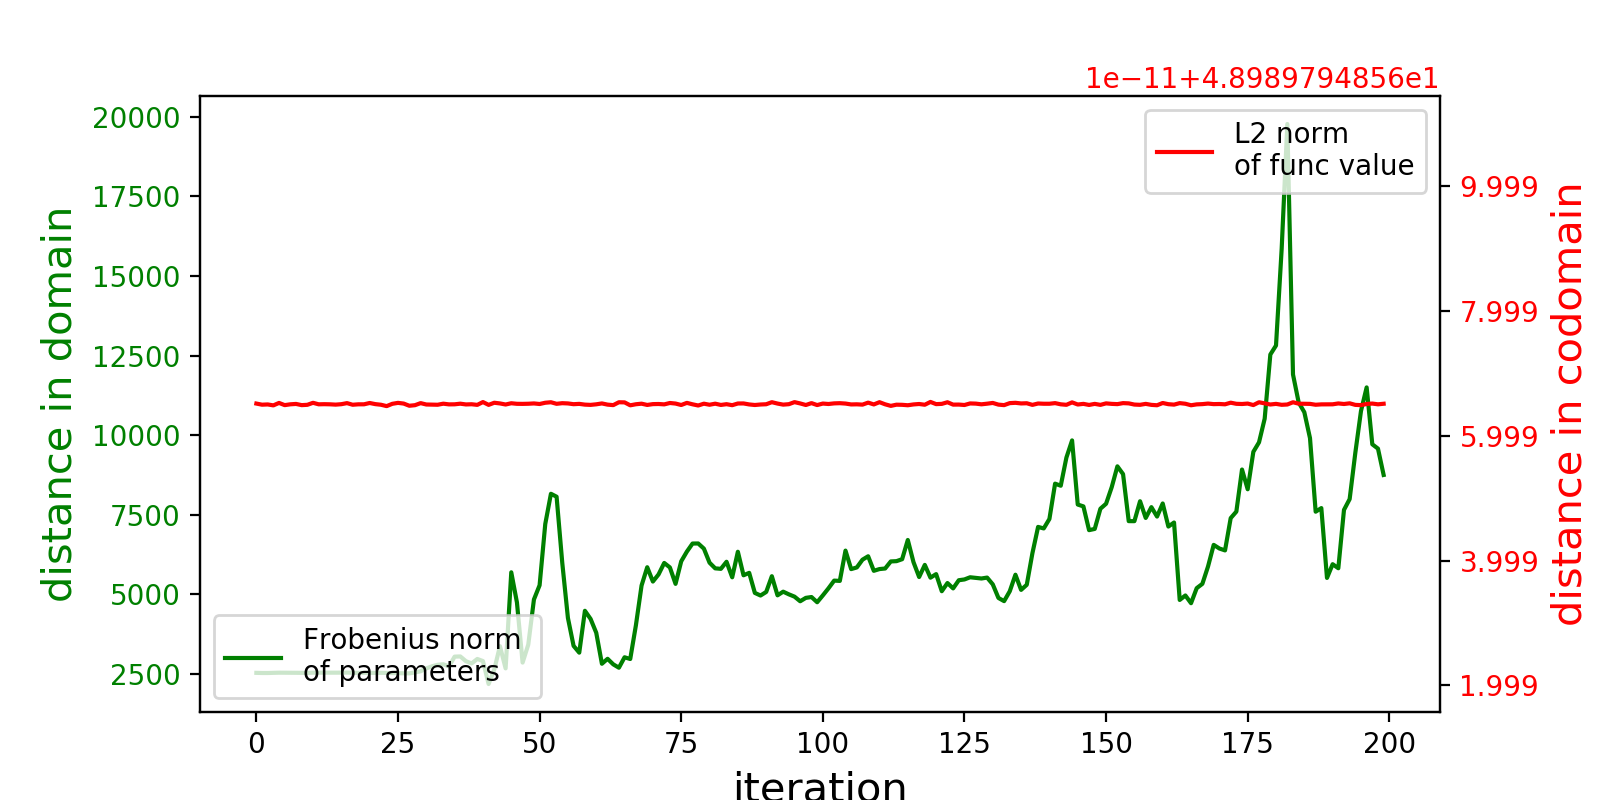

In [84]:
ex3_lineSearchCMA.plot_distance()

<IPython.core.display.Javascript object>


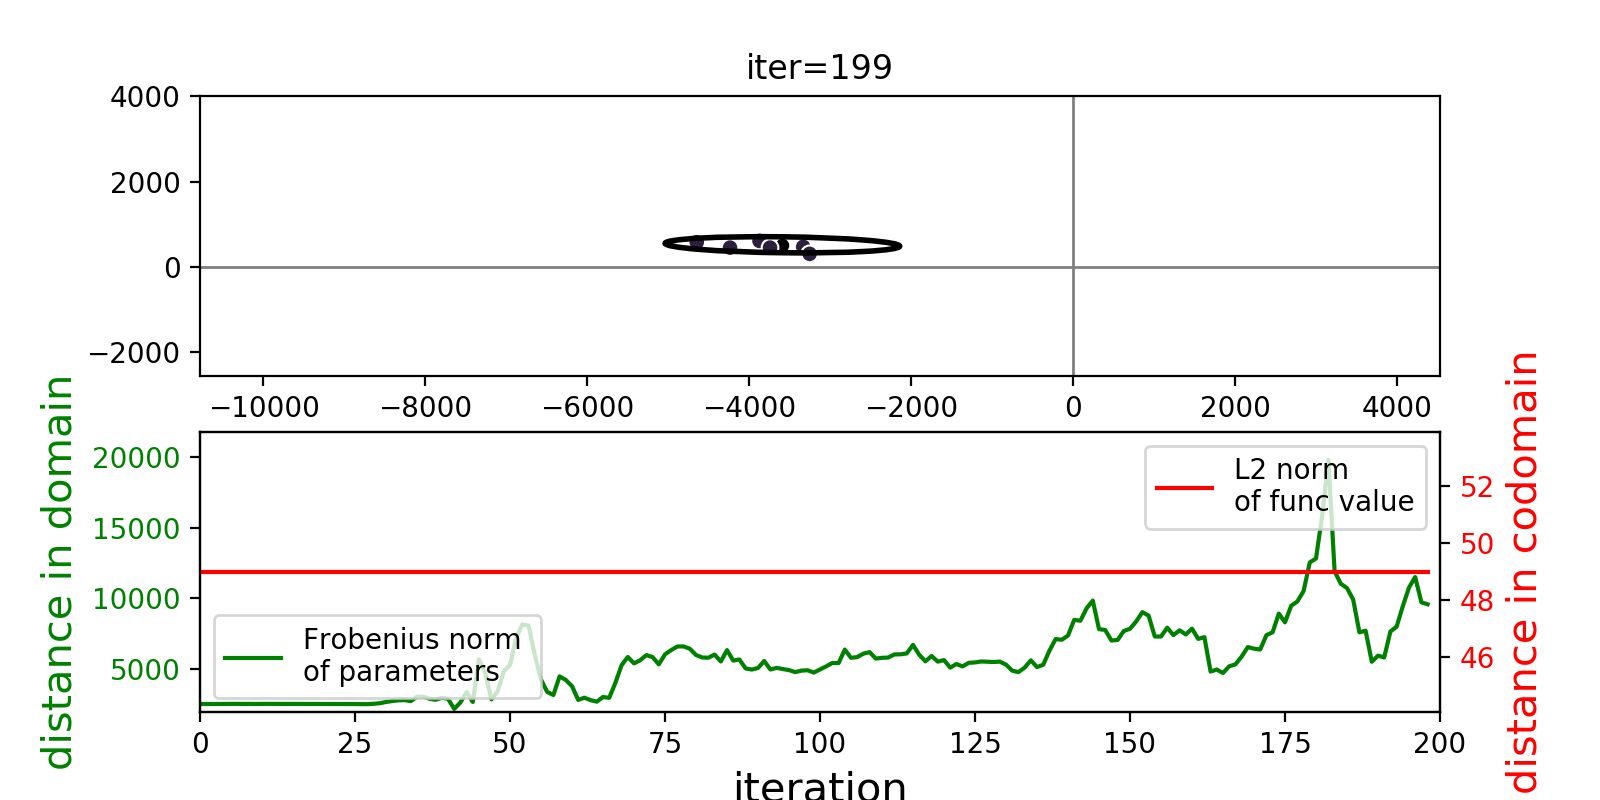

In [85]:
ex3_lineSearchCMA.animate_scatterplot_distance()

In [ ]:
ex3_lineSearchCMA.print_mean_variance()

### round off

In [99]:
np.random.seed(34)
mean0 = np.array([[629.193], [822.221]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2

ex3_roundOffCMA = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)
%time ex3_roundOffCMA.do_experiments(mean0, sigma, alpha, beta, round_off)

*******starting soon, intitial mean: ********
 [[629.193]
 [822.221]]
stuck in local minimum!!
eigenvalue of variance = [0.000 0.011]
min = 20.0, total iterations = 132, total evaluatios = 792
 position = 627.0 807.0

CPU times: user 59.8 ms, sys: 2.67 ms, total: 62.5 ms
Wall time: 62.5 ms


<IPython.core.display.Javascript object>


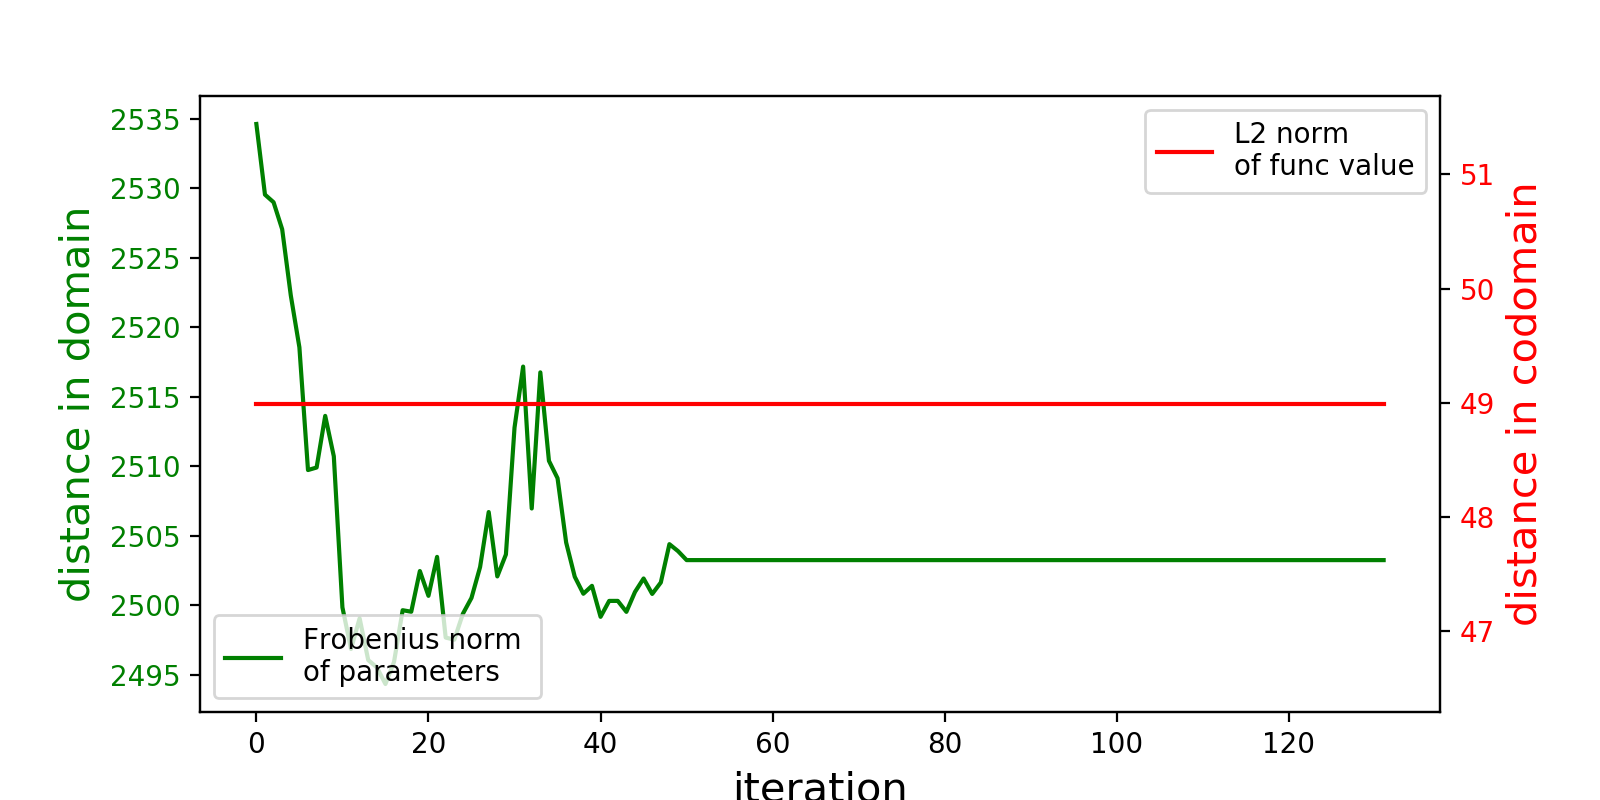

In [100]:
ex3_roundOffCMA.plot_distance()

# continue the work of last week

## plot the graph of convergence probablity map

### check of symmetric property of line search

In [103]:
print(line_search(np.array([1.805, 0.525]), alpha, beta, ackley, derivative_ackley))
print(line_search(np.array([-1.805, 0.525]), alpha, beta, ackley, derivative_ackley))
print(line_search(np.array([1.805, -0.525]), alpha, beta, ackley, derivative_ackley))
print(line_search(np.array([-1.805, -0.525]), alpha, beta, ackley, derivative_ackley))
print(line_search(np.array([0.525, 1.805]), alpha, beta, ackley, derivative_ackley))

(array([1.959, 0.000]), 69)
(array([-1.959, 0.000]), 69)
(array([1.959, -0.000]), 69)
(array([-1.959, -0.000]), 69)
(array([0.000, 1.959]), 69)


### generate point cloud

In [165]:
from io import StringIO # Python3 use: from io import StringIO
import sys

def generate_point_cloud(adjust):
    def random_intial_mean(radius):
        rx = np.random.rand() * radius
        ry = np.random.rand() * radius 
        if(ry > rx):
            rx, ry = ry, rx
        return np.array([rx, ry])
    
    num = 500
    radius = 1000
    res = np.zeros((num, ))
    points = np.zeros((num, 2))
    result_strings = []
    np.random.seed(111)
    sigma = np.ones((2,)) * 40
    alpha = 1
    beta = 2
    ex_cloud_point = non_convex_optimisation(ackley, derivative_ackley, np.array([0, 0]), 0)

    for i in range(num):
        points[i] = random_intial_mean(radius)
        record = points[i]
        ex_cloud_point.do_experiments(points[i].reshape(2,1), sigma, alpha, beta, adjust)
        val, arg, stats = ex_cloud_point.get_recorded_data()
        if(stats['status'] == 'd'):
            res[i] = 1
        elif(stats['status'] == 'l'):
            res[i] = 0.5
        else:
            res[i] = 0
    return res, points

def plot_prob_vs_radius(res, points):
    distance = np.linalg.norm(points, axis=1)
    idx = np.argsort(distance)
    dis_ascending = distance[idx]
    res_ascending = res[idx]
    prob = np.zeros((num, ))
    for i in range(num):
        prob[i] = np.sum(res_ascending[:i+1] == 0) / (i + 1) 
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('round off')
    ax.set_xlim(0, max(dis_ascending))
    ax.set_ylim(0, 2)
    ax.set_xlabel('distance from origin', fontsize=13)
    ax.set_ylabel('prob of global minminum', fontsize=13)
    ax.plot(dis_ascending, prob)
    
def plot_cloud_point(res, points):
    fig = plt.figure(figsize=(7,7))
    # one quadrant
    x1 = np.hstack((points[:,0], points[:,1]))
    y1 = np.hstack((points[:,1], points[:,0]))
    res1 = np.hstack((res, res))
    # two qudrant
    x2 = np.hstack((x1, -x1))
    y2 = np.hstack((y1, y1))
    res2 = np.hstack((res1, res1))
    # four qudrant
    x = np.hstack((x2, -x2))
    y = np.hstack((y2, -y2))
    hue = np.hstack((res2, res2))

    p = sns.scatterplot(x=x, y=y, 
                        color="r", hue=hue, hue_norm=(0, 1), legend=False)
    p.set_title('global convergence map of round-off CMA_ES')

### pure CMA

In [151]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
%time res, points = generate_point_cloud(do_nothing)
sys.stdout = old_stdout

<IPython.core.display.Javascript object>


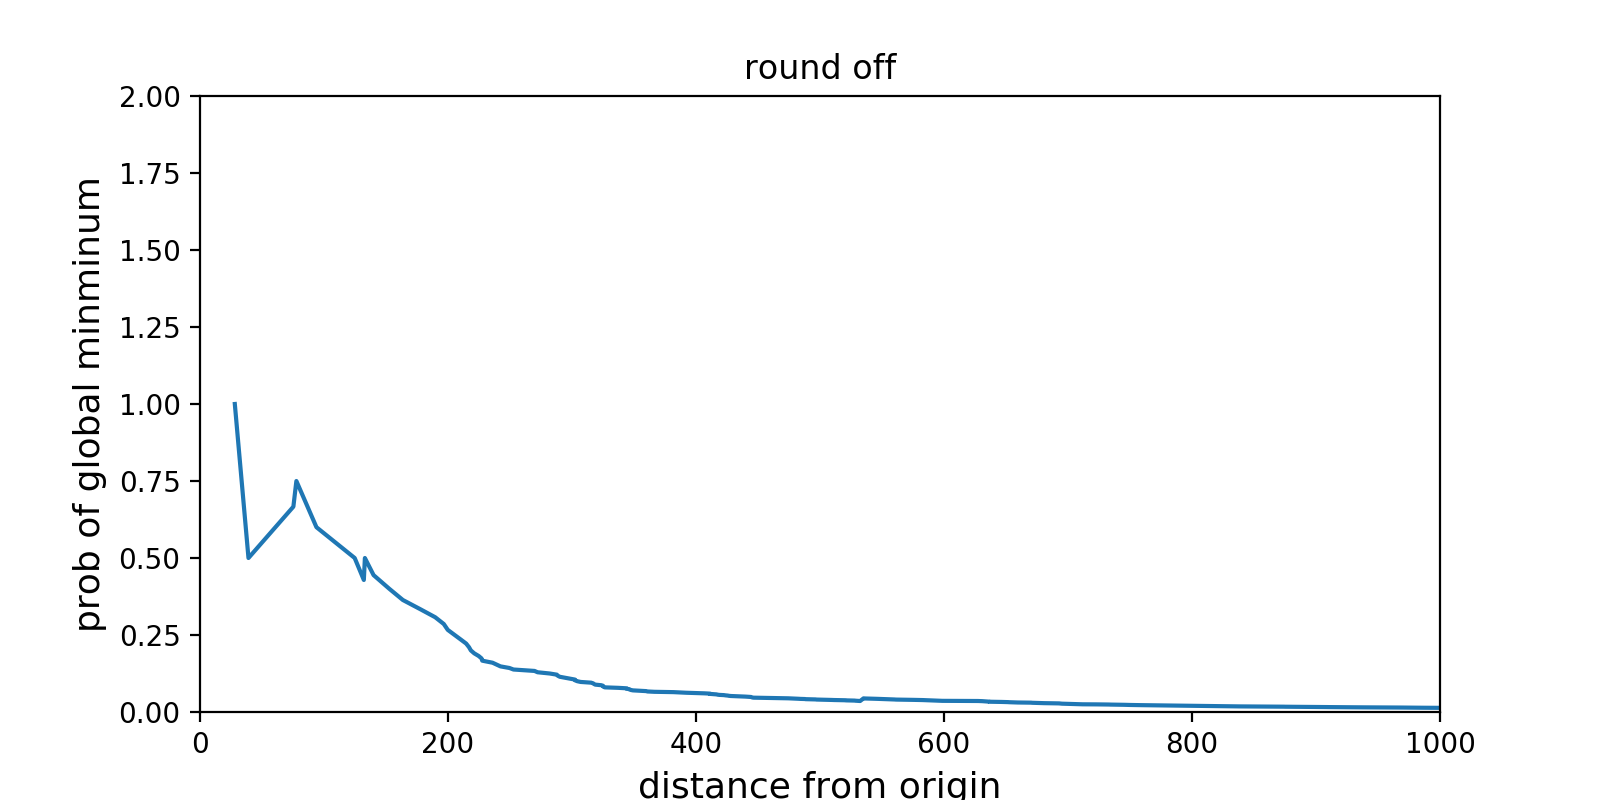

In [152]:
plot_prob_vs_radius(res, points)

<IPython.core.display.Javascript object>


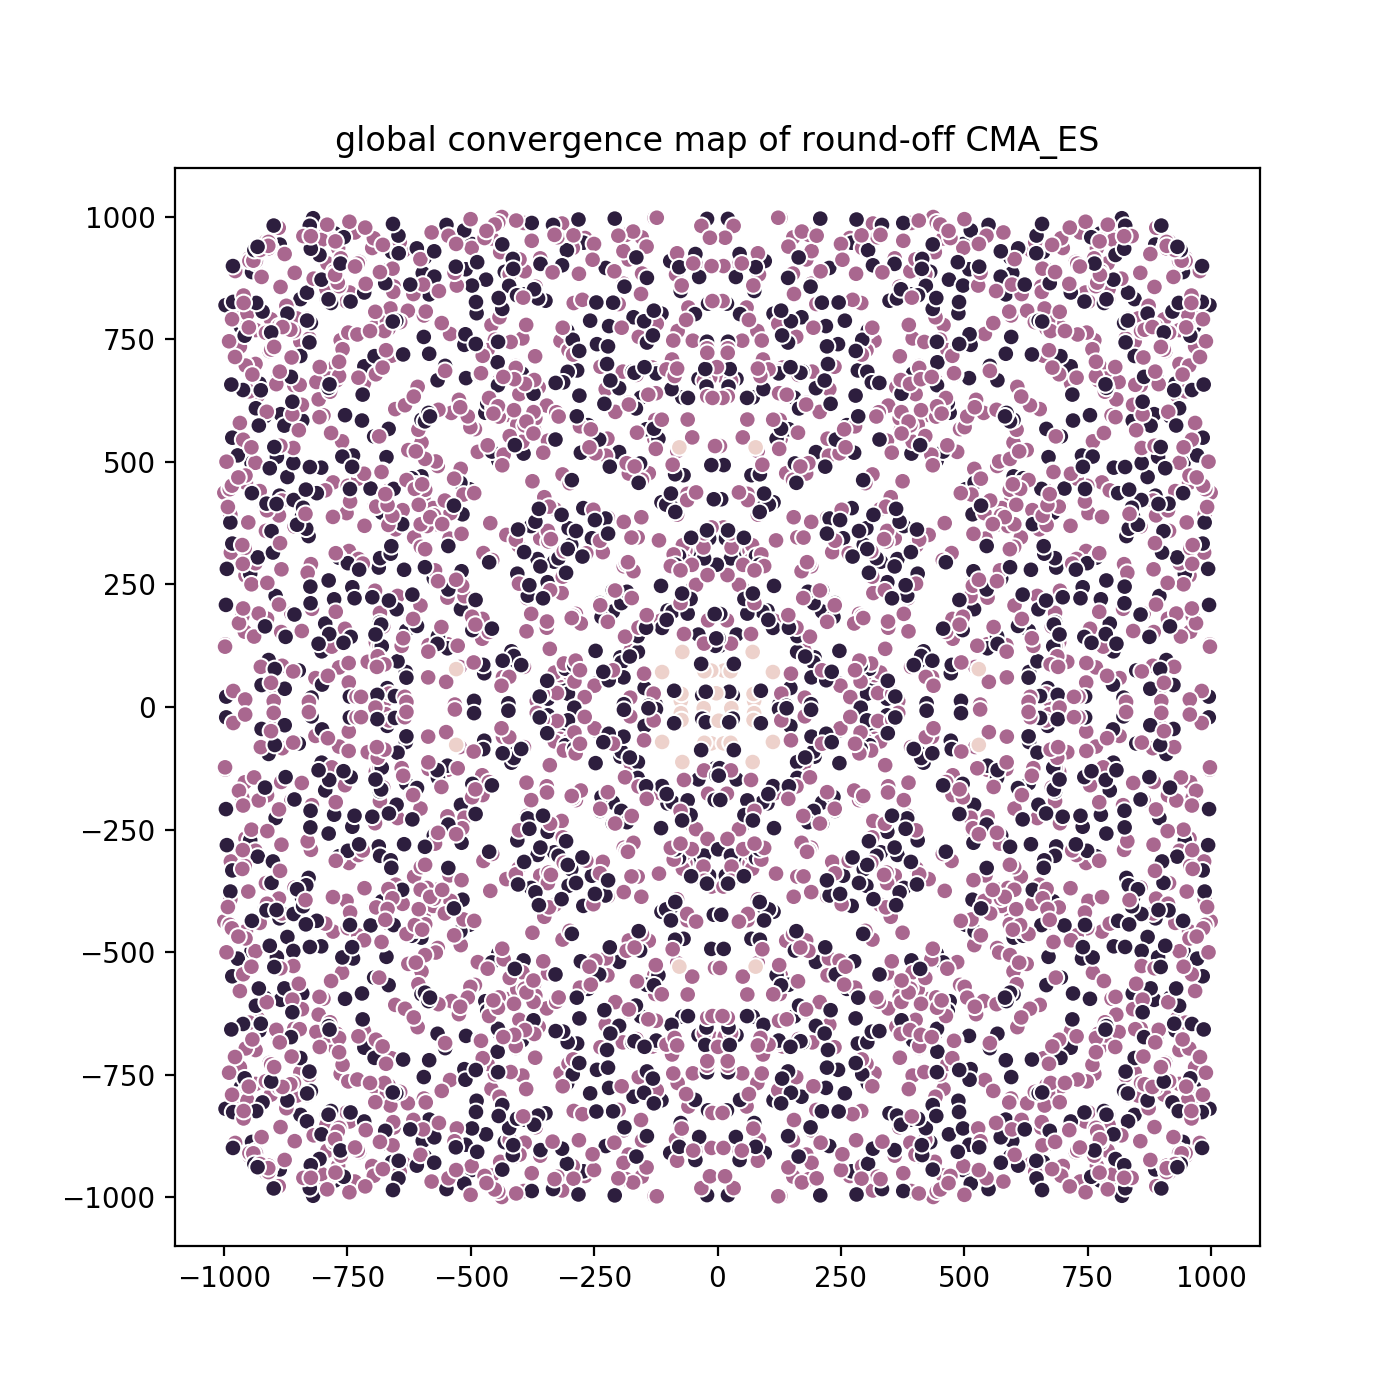

In [153]:
plot_cloud_point(res, points)

### line search 

In [154]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
%time res, points = generate_point_cloud(line_search)
sys.stdout = old_stdout

<IPython.core.display.Javascript object>


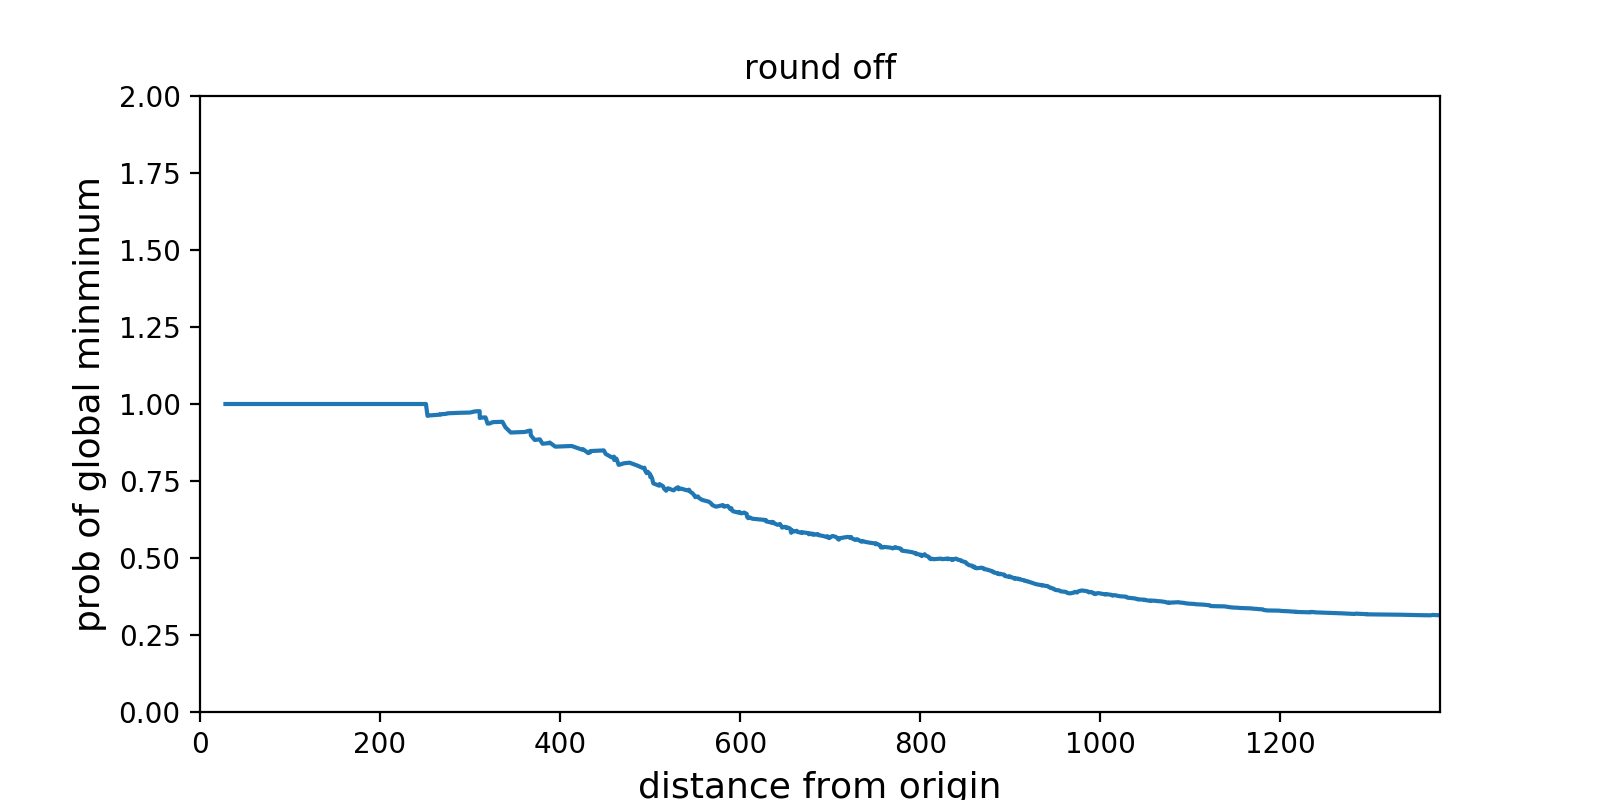

In [166]:
plot_prob_vs_radius(res, points)

<IPython.core.display.Javascript object>


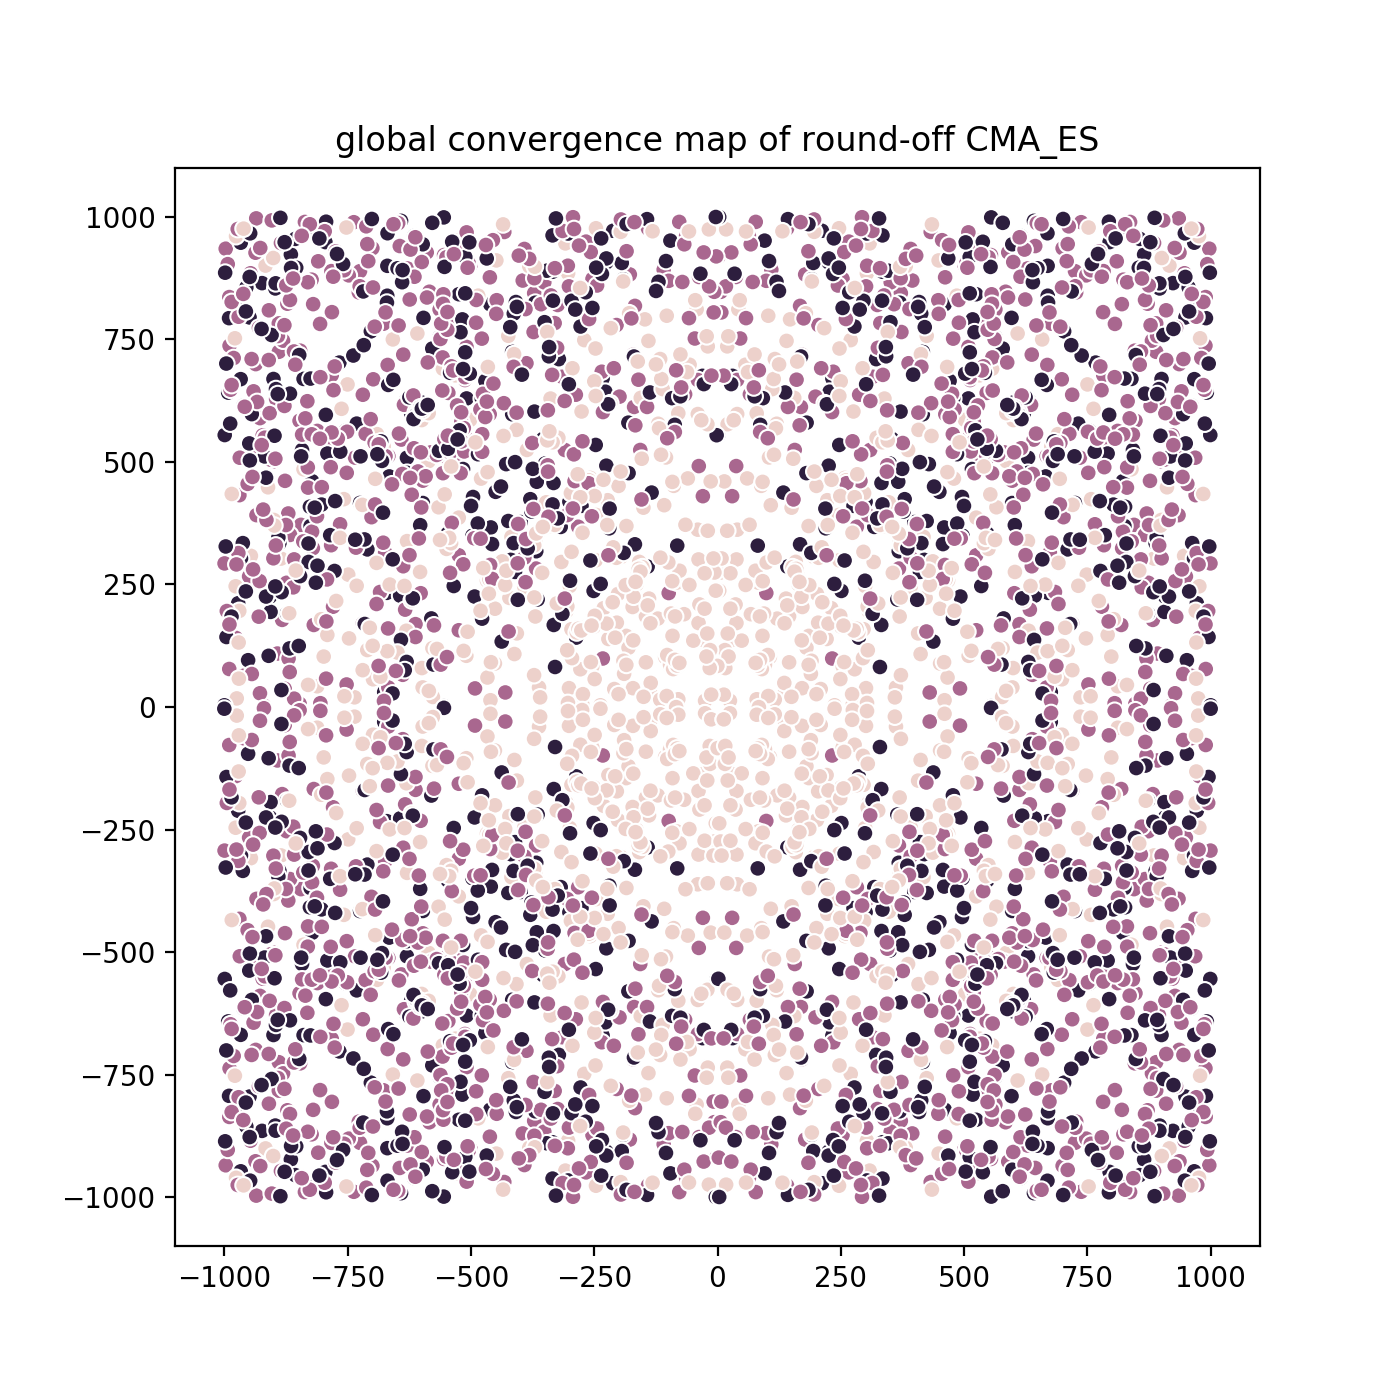

In [156]:
plot_cloud_point(res, points)

### round off

In [167]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
%time res, points = generate_point_cloud(round_off)
sys.stdout = old_stdout

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in sqrt
/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in less
/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


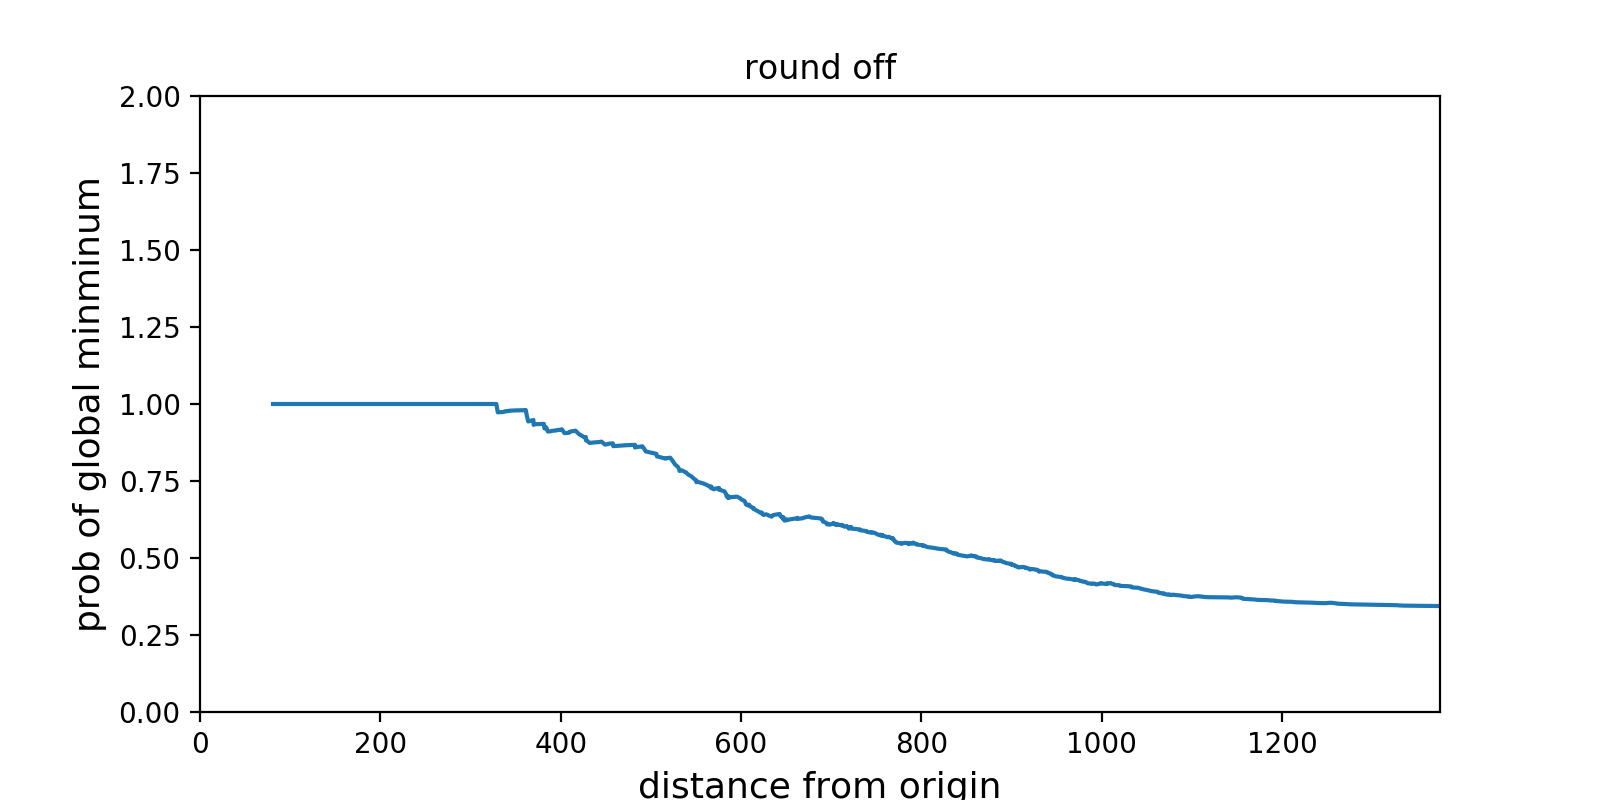

In [168]:
plot_prob_vs_radius(res, points)

<IPython.core.display.Javascript object>


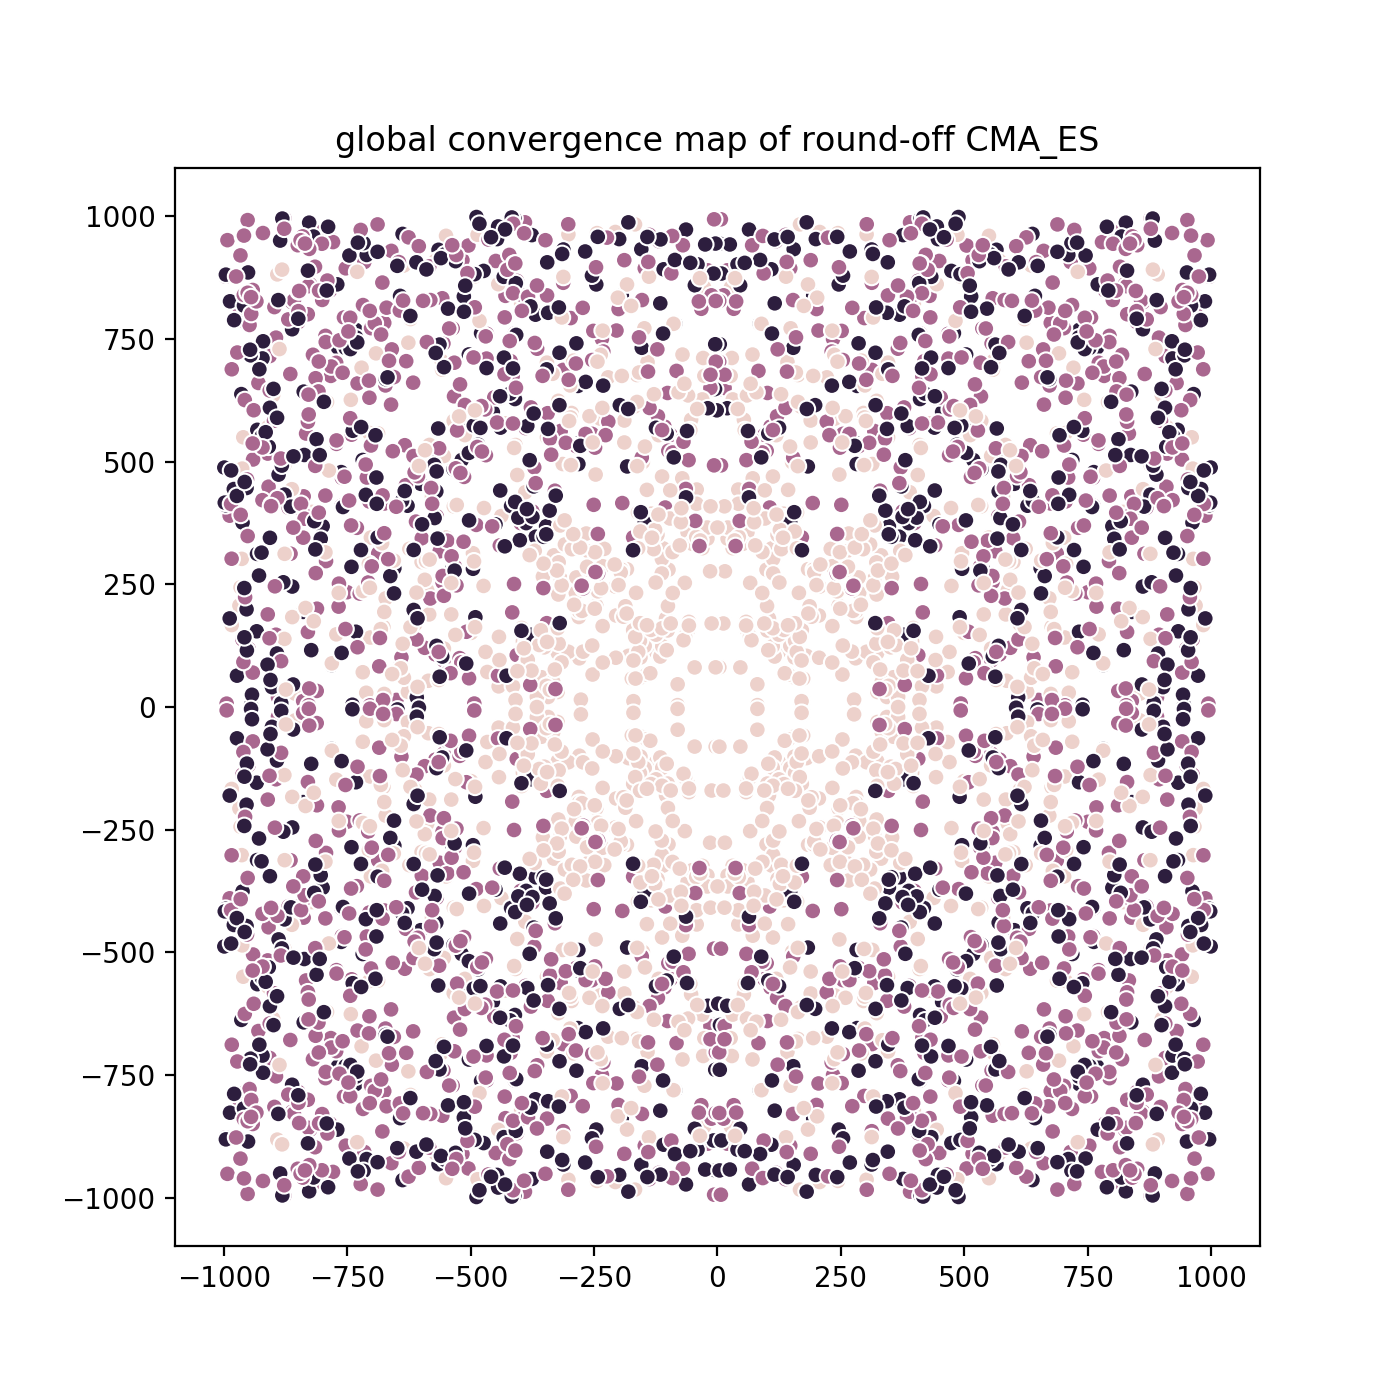

In [150]:
plot_cloud_point(res, points)

<IPython.core.display.Javascript object>


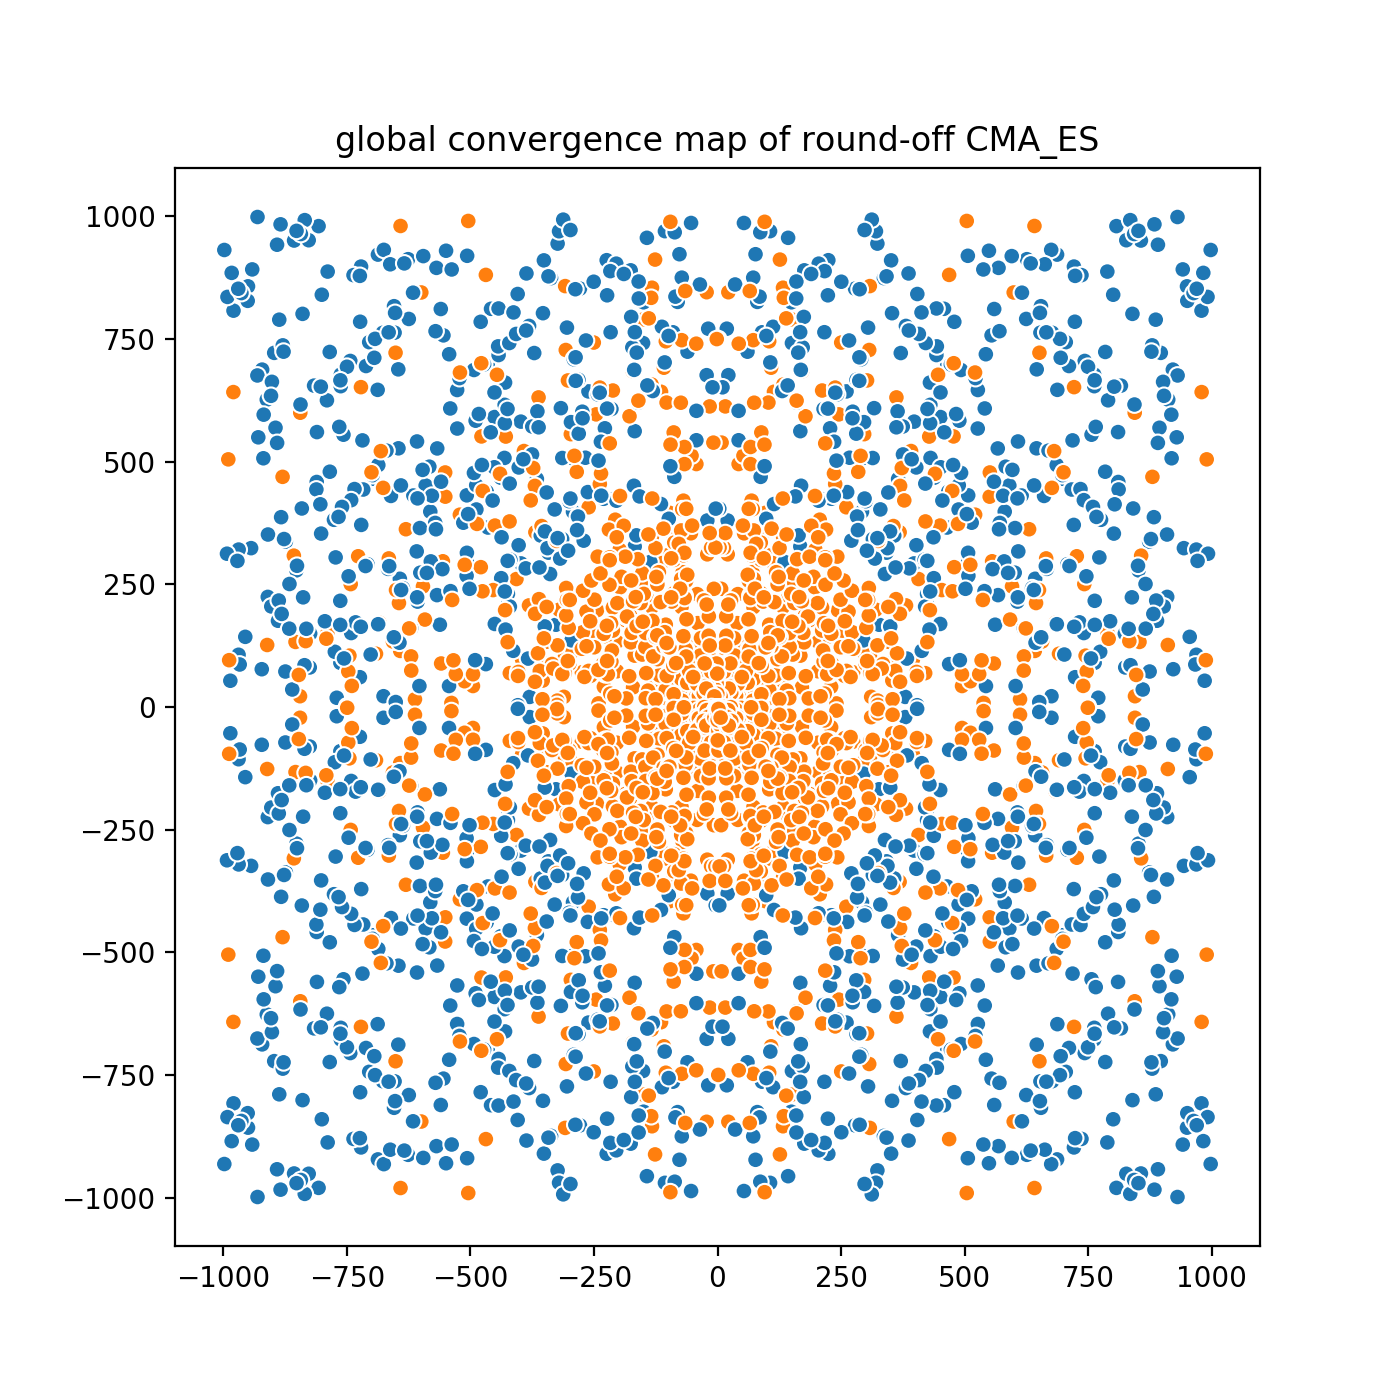

Text(0.5, 1.0, 'global convergence map of round-off CMA_ES')

In [17]:
fig = plt.figure(figsize=(7,7))
# one quadrant
x1 = np.hstack((points[:,0], points[:,1]))
y1 = np.hstack((points[:,1], points[:,0]))
res1 = np.hstack((res, res))
# two qudrant
x2 = np.hstack((x1, -x1))
y2 = np.hstack((y1, y1))
res2 = np.hstack((res1, res1))
# four qudrant
x = np.hstack((x2, -x2))
y = np.hstack((y2, -y2))
hue = np.hstack((res2, res2))

p = sns.scatterplot(x=x, y=y, 
                    color="r", hue=res, hue_norm=(0, 1), legend=False)
p.set_title('global convergence map of round-off CMA_ES', )
